In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
r2_limit = 0.8
smoothing_points = 1

if smoothing_points > 1:
    built_dir_name = f'R2_{int(r2_limit*10):02}/smoothed_{smoothing_points}'
else:
    built_dir_name = f'R2_{int(r2_limit*10):02}/'


In [4]:
built_dir_name = built_dir_name.replace('/', '_')

In [5]:
file_path = f'/home/earthquakes1/homes/Rebecca/phd/stf/data/results/{built_dir_name}gaussians_info.csv'
df = pd.read_csv(file_path)
df['int_magnitude'] = df['magnitude'].astype(int)

In [6]:
df

,eq_name,magnitude,moment,depth,n_gaussians,r_squared,magnitude.1,r_squared_1,r_squared_2,r_squared_3,r_squared_4,r_squared_5,r_squared_6,r_squared_7,r_squared_8,r_squared_9,int_magnitude
0,FCTs_20170818_025925_NORTH_OF_ASCENSION_ISLAND,6.591,9.698000e+18,17.0,2,0.950201,6.591,0.688852,0.950201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
1,FCTs_20110126_154229_NORTHERN_SUMATRA__INDONESIA,6.128,1.960000e+18,25.0,1,0.915196,6.128,0.915196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
2,FCTs_19981010_162908_MINAHASSA_PENINSULA__SULA...,5.927,9.777000e+17,17.0,1,0.968222,5.927,0.968222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
3,FCTs_19920730_082446_XIZANG,6.017,1.336000e+18,13.0,1,0.970686,6.017,0.970686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
4,FCTs_19960327_205206_NEAR_COAST_OF_NICARAGUA,6.157,2.168000e+18,8.0,5,0.923961,6.157,0.428206,0.770342,0.797733,0.772501,0.923961,NaN,NaN,NaN,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4084,FCTs_20030725_221329_NEAR_EAST_COAST_OF_HONSHU...,6.039,1.443000e+18,6.0,1,0.963310,6.039,0.963310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
4085,FCTs_20080429_052604_HOKKAIDO__JAPAN_REGION,5.760,5.488000e+17,49.0,1,0.992470,5.760,0.992470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
4086,FCTs_20210927_061721_CRETE__GREECE,5.904,9.040000e+17,7.0,1,0.973409,5.904,0.973409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
4087,FCTs_20160105_022111_SOUTHEAST_OF_SHIKOKU__JAPAN,5.954,1.075000e+18,6.0,2,0.831466,5.954,-0.039975,0.831466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


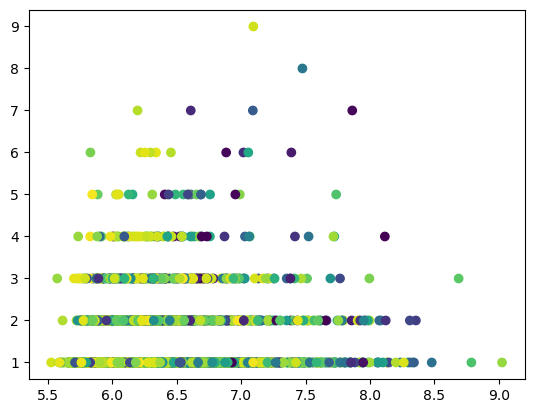

In [7]:
plt.scatter(df['magnitude'], df['n_gaussians'], c=df['r_squared'])

<BarContainer object of 4089 artists>

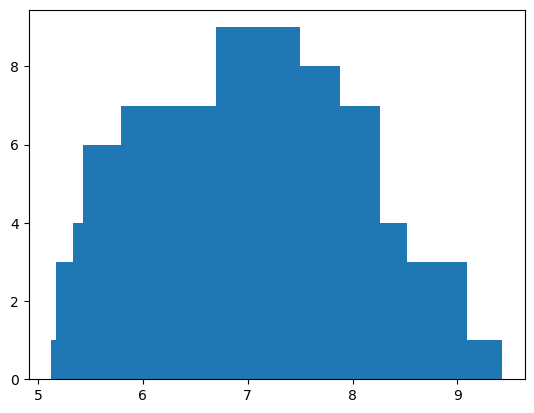

In [8]:
plt.bar(df['magnitude'], df['n_gaussians'])

In [9]:
df[df['int_magnitude']==7]['n_gaussians']

7       1
11      1
17      1
34      1
40      2
       ..
4044    1
4055    1
4065    1
4075    4
4088    1
Name: n_gaussians, Length: 336, dtype: int64

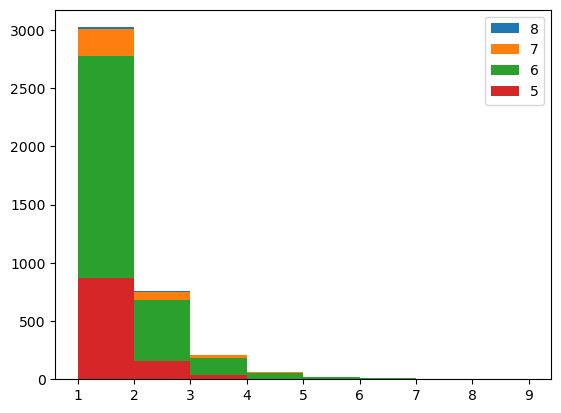

In [10]:
n_5, _, _ = plt.hist(df[df['int_magnitude']==5]['n_gaussians'], bins=np.arange(1, 10, 1))
n_6, _, _ = plt.hist(df[df['int_magnitude']==6]['n_gaussians'], bins=np.arange(1, 10, 1))
n_7, _, _ = plt.hist(df[df['int_magnitude']==7]['n_gaussians'], bins=np.arange(1, 10, 1))
n_8, _, _ = plt.hist(df[df['int_magnitude']==8]['n_gaussians'], bins=np.arange(1, 10, 1))

plt.close()


plt.stairs(n_5 + n_6 + n_7 + n_8, edges=np.arange(1, 10, 1), label='8', fill=True)
plt.stairs(n_5 + n_6 + n_7, edges=np.arange(1, 10, 1), label='7', fill=True)
plt.stairs(n_5 + n_6, edges=np.arange(1, 10, 1), label='6', fill=True)
plt.stairs(n_5, edges=np.arange(1, 10, 1), label='5', fill=True)

#plt.yscale('log')

plt.legend()

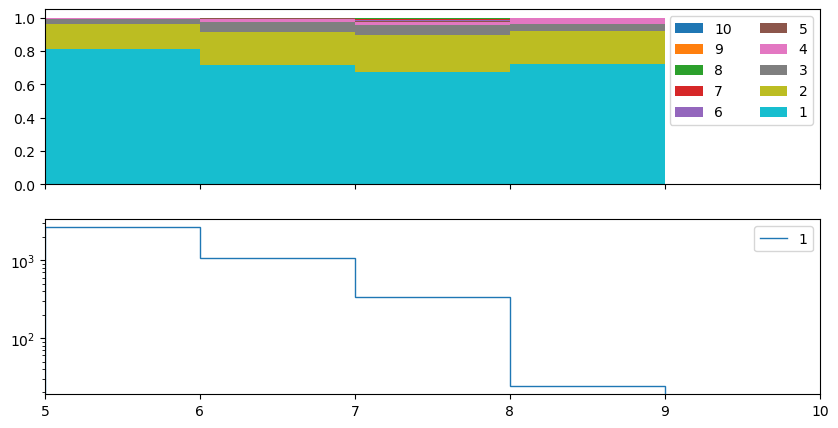

In [11]:
n_1, _, _ = plt.hist(df[df['n_gaussians']==1]['int_magnitude'], bins=np.arange(5, 10, 1))
n_2, _, _ = plt.hist(df[df['n_gaussians']==2]['int_magnitude'], bins=np.arange(5, 10, 1))
n_3, _, _ = plt.hist(df[df['n_gaussians']==3]['int_magnitude'], bins=np.arange(5, 10, 1))
n_4, _, _ = plt.hist(df[df['n_gaussians']==4]['int_magnitude'], bins=np.arange(5, 10, 1))
n_5, _, _ = plt.hist(df[df['n_gaussians']==5]['int_magnitude'], bins=np.arange(5, 10, 1))
n_6, _, _ = plt.hist(df[df['n_gaussians']==6]['int_magnitude'], bins=np.arange(5, 10, 1))
n_7, _, _ = plt.hist(df[df['n_gaussians']==7]['int_magnitude'], bins=np.arange(5, 10, 1))
n_8, _, _ = plt.hist(df[df['n_gaussians']==8]['int_magnitude'], bins=np.arange(5, 10, 1))
n_9, _, _ = plt.hist(df[df['n_gaussians']==9]['int_magnitude'], bins=np.arange(5, 10, 1))
n_10, _, _ = plt.hist(df[df['n_gaussians']==10]['int_magnitude'], bins=np.arange(5, 10, 1))


plt.close()

fig, axs = plt.subplots(2, 1, figsize=(10, 5), sharex=True)

total = n_1+n_2+n_3+n_4+n_5+n_6+n_7+n_8+n_9+n_10
axs[0].stairs((n_1+n_2+n_3+n_4+n_5+n_6+n_7+n_8+n_9+n_10)/total, edges=np.arange(5, 10, 1), label='10', fill=True)
axs[0].stairs((n_1+n_2+n_3+n_4+n_5+n_6+n_7+n_8+n_9)/total, edges=np.arange(5, 10, 1), label='9', fill=True)
axs[0].stairs((n_1+n_2+n_3+n_4+n_5+n_6+n_7+n_8)/total, edges=np.arange(5, 10, 1), label='8', fill=True)
axs[0].stairs((n_1+n_2+n_3+n_4+n_5+n_6+n_7)/total, edges=np.arange(5, 10, 1), label='7', fill=True)
axs[0].stairs((n_1+n_2+n_3+n_4+n_5+n_6)/total, edges=np.arange(5, 10, 1), label='6', fill=True)
axs[0].stairs((n_1+n_2+n_3+n_4+n_5)/total, edges=np.arange(5, 10, 1), label='5', fill=True)
axs[0].stairs((n_1+n_2+n_3+n_4)/total, edges=np.arange(5, 10, 1), label='4', fill=True)
axs[0].stairs((n_1+n_2+n_3)/total, edges=np.arange(5, 10, 1), label='3', fill=True)
axs[0].stairs((n_1+n_2)/total, edges=np.arange(5, 10, 1), label='2', fill=True)
axs[0].stairs(n_1/total, edges=np.arange(5, 10, 1), label='1', fill=True)

axs[1].stairs(df['int_magnitude'].value_counts()[:-1], edges = np.arange(5, 10, 1),  label='1')

#axs[0].set_yscale('log')
axs[1].set_yscale('log')

axs[0].set_xlim(5, 10)
axs[1].set_xlim(5, 10)

axs[0].legend(ncol = 2)
axs[1].legend()

ValueError: Size mismatch between "values" and "edges". Expected `len(values) + 1 == len(edges)`, but `len(values) = 4` and `len(edges) = 6`.

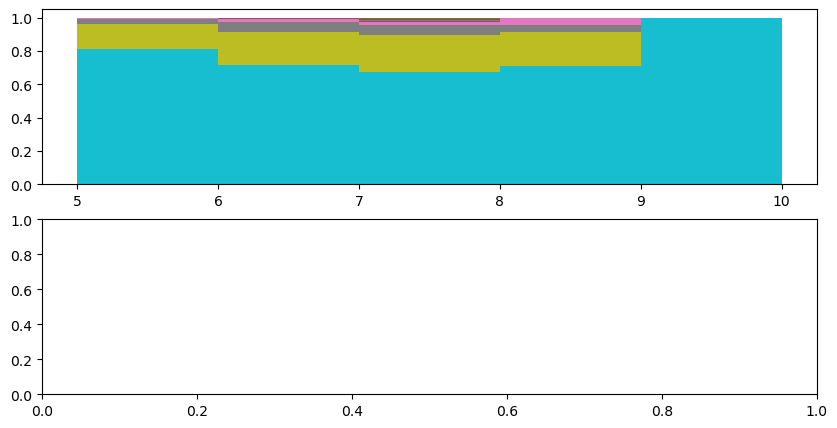

In [12]:
n_1, _, _ = plt.hist(df[df['n_gaussians']==1]['int_magnitude'], bins=np.arange(5, 11, 1))
n_2, _, _ = plt.hist(df[df['n_gaussians']==2]['int_magnitude'], bins=np.arange(5, 11, 1))
n_3, _, _ = plt.hist(df[df['n_gaussians']==3]['int_magnitude'], bins=np.arange(5, 11, 1))
n_4, _, _ = plt.hist(df[df['n_gaussians']==4]['int_magnitude'], bins=np.arange(5, 11, 1))
n_5, _, _ = plt.hist(df[df['n_gaussians']==5]['int_magnitude'], bins=np.arange(5, 11, 1))
n_6, _, _ = plt.hist(df[df['n_gaussians']==6]['int_magnitude'], bins=np.arange(5, 11, 1))
n_7, _, _ = plt.hist(df[df['n_gaussians']==7]['int_magnitude'], bins=np.arange(5, 11, 1))
n_8, _, _ = plt.hist(df[df['n_gaussians']==8]['int_magnitude'], bins=np.arange(5, 11, 1))
n_9, _, _ = plt.hist(df[df['n_gaussians']==9]['int_magnitude'], bins=np.arange(5, 11, 1))
n_10, _, _ = plt.hist(df[df['n_gaussians']==10]['int_magnitude'], bins=np.arange(5, 11, 1))


plt.close()

fig, axs = plt.subplots(2, 1, figsize=(10, 5))

total = n_1+n_2+n_3+n_4+n_5+n_6+n_7+n_8+n_9+n_10
axs[0].stairs((n_1+n_2+n_3+n_4+n_5+n_6+n_7+n_8+n_9+n_10)/total, edges=np.arange(5, 11, 1), label='10', fill=True)
axs[0].stairs((n_1+n_2+n_3+n_4+n_5+n_6+n_7+n_8+n_9)/total, edges=np.arange(5, 11, 1), label='9', fill=True)
axs[0].stairs((n_1+n_2+n_3+n_4+n_5+n_6+n_7+n_8)/total, edges=np.arange(5, 11, 1), label='8', fill=True)
axs[0].stairs((n_1+n_2+n_3+n_4+n_5+n_6+n_7)/total, edges=np.arange(5, 11, 1), label='7', fill=True)
axs[0].stairs((n_1+n_2+n_3+n_4+n_5+n_6)/total, edges=np.arange(5, 11, 1), label='6', fill=True)
axs[0].stairs((n_1+n_2+n_3+n_4+n_5)/total, edges=np.arange(5, 11, 1), label='5', fill=True)
axs[0].stairs((n_1+n_2+n_3+n_4)/total, edges=np.arange(5, 11, 1), label='4', fill=True)
axs[0].stairs((n_1+n_2+n_3)/total, edges=np.arange(5, 11, 1), label='3', fill=True)
axs[0].stairs((n_1+n_2)/total, edges=np.arange(5, 11, 1), label='2', fill=True)
axs[0].stairs(n_1/total, edges=np.arange(5, 11, 1), label='1', fill=True)

axs[1].stairs(df['int_magnitude'].value_counts()[:-1], edges = np.arange(5, 11, 1),  label='1')

#plt.yscale('log')

plt.legend()

In [ ]:
df.int_magnitude.value_counts()

int_magnitude
6    2662
5    1066
7     336
8      24
9       1
Name: count, dtype: int64

In [62]:
import pandas as pd

In [63]:
columns = ['event', 'scardec_opt_r2', 'scardec_opt_num_gaussians', 'scardec_moy_r2', 'scardec_moy_num_gaussians', 'ye_r2', 'ye_num_gaussians', 'usgs_r2', 'usgs_num_gaussians', 'isc_r2', 'isc_num_gaussians', 'sigloch_0_r2', 'sigloch_0_num_gaussians', 'sigloch_1_r2', 'sigloch_1_num_gaussians', 'sigloch_2_r2', 'sigloch_2_num_gaussians', 'sigloch_3_r2', 'sigloch_3_num_gaussians', 'sigloch_4_r2', 'sigloch_4_num_gaussians', 'sigloch_5_r2', 'sigloch_5_num_gaussians', 'sigloch_6_r2', 'sigloch_6_num_gaussians', 'sigloch_7_r2', 'sigloch_7_num_gaussians', 'sigloch_8_r2', 'sigloch_8_num_gaussians', 'sigloch_9_r2', 'sigloch_9_num_gaussians']


In [64]:
df = pd.read_csv(f'/home/earthquakes1/homes/Rebecca/phd/stf/figures/large_scale_peaks_all/R2_9.5/gaussians_dict.csv', names=columns)


In [65]:
df

,event,scardec_opt_r2,scardec_opt_num_gaussians,scardec_moy_r2,scardec_moy_num_gaussians,ye_r2,ye_num_gaussians,usgs_r2,usgs_num_gaussians,isc_r2,...,sigloch_5_r2,sigloch_5_num_gaussians,sigloch_6_r2,sigloch_6_num_gaussians,sigloch_7_r2,sigloch_7_num_gaussians,sigloch_8_r2,sigloch_8_num_gaussians,sigloch_9_r2,sigloch_9_num_gaussians
20170818_0259,NaN,0.969343,5.0,0.975607,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20110126_1542,NaN,0.978251,2.0,0.983437,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19981010_1629,NaN,0.991595,2.0,0.995624,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19920730_0824,NaN,0.965802,2.0,0.981683,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19960327_2052,NaN,0.998949,8.0,0.994544,6.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20111214_0048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20120317_1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20060106_0339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20090104_0714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
df = df.drop(columns=['event'])

In [67]:
df

,scardec_opt_r2,scardec_opt_num_gaussians,scardec_moy_r2,scardec_moy_num_gaussians,ye_r2,ye_num_gaussians,usgs_r2,usgs_num_gaussians,isc_r2,isc_num_gaussians,...,sigloch_5_r2,sigloch_5_num_gaussians,sigloch_6_r2,sigloch_6_num_gaussians,sigloch_7_r2,sigloch_7_num_gaussians,sigloch_8_r2,sigloch_8_num_gaussians,sigloch_9_r2,sigloch_9_num_gaussians
20170818_0259,0.969343,5.0,0.975607,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20110126_1542,0.978251,2.0,0.983437,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19981010_1629,0.991595,2.0,0.995624,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19920730_0824,0.965802,2.0,0.981683,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19960327_2052,0.998949,8.0,0.994544,6.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20111214_0048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20120317_1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20060106_0339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20090104_0714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
unique_indices_count = df.index.nunique()
unique_indices_count

4531

In [19]:
df = df.drop_duplicates()

In [20]:
df

,scardec_opt_r2,scardec_opt_num_gaussians,scardec_moy_r2,scardec_moy_num_gaussians,ye_r2,ye_num_gaussians,usgs_r2,usgs_num_gaussians,isc_r2,isc_num_gaussians,...,sigloch_5_r2,sigloch_5_num_gaussians,sigloch_6_r2,sigloch_6_num_gaussians,sigloch_7_r2,sigloch_7_num_gaussians,sigloch_8_r2,sigloch_8_num_gaussians,sigloch_9_r2,sigloch_9_num_gaussians
20170818_0259,0.969343,5.0,0.975607,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20110126_1542,0.978251,2.0,0.983437,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19981010_1629,0.991595,2.0,0.995624,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19920730_0824,0.965802,2.0,0.981683,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19960327_2052,0.998949,8.0,0.994544,6.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20111214_0048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20120317_1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20060106_0339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20090104_0714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df.columns

Index(['scardec_opt_r2', 'scardec_opt_num_gaussians', 'scardec_moy_r2',
       'scardec_moy_num_gaussians', 'ye_r2', 'ye_num_gaussians', 'usgs_r2',
       'usgs_num_gaussians', 'isc_r2', 'isc_num_gaussians', 'sigloch_0_r2',
       'sigloch_0_num_gaussians', 'sigloch_1_r2', 'sigloch_1_num_gaussians',
       'sigloch_2_r2', 'sigloch_2_num_gaussians', 'sigloch_3_r2',
       'sigloch_3_num_gaussians', 'sigloch_4_r2', 'sigloch_4_num_gaussians',
       'sigloch_5_r2', 'sigloch_5_num_gaussians', 'sigloch_6_r2',
       'sigloch_6_num_gaussians', 'sigloch_7_r2', 'sigloch_7_num_gaussians',
       'sigloch_8_r2', 'sigloch_8_num_gaussians', 'sigloch_9_r2',
       'sigloch_9_num_gaussians'],
      dtype='object')

In [22]:
combined = pd.read_csv('/home/earthquakes1/homes/Rebecca/phd/stf/data/combined_scardec_ye_usgs_sigloch_isc_mag.csv')


In [27]:
df

,scardec_opt_r2,scardec_opt_num_gaussians,scardec_moy_r2,scardec_moy_num_gaussians,ye_r2,ye_num_gaussians,usgs_r2,usgs_num_gaussians,isc_r2,isc_num_gaussians,...,sigloch_5_r2,sigloch_5_num_gaussians,sigloch_6_r2,sigloch_6_num_gaussians,sigloch_7_r2,sigloch_7_num_gaussians,sigloch_8_r2,sigloch_8_num_gaussians,sigloch_9_r2,sigloch_9_num_gaussians
20170818_0259,0.969343,5.0,0.975607,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20110126_1542,0.978251,2.0,0.983437,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19981010_1629,0.991595,2.0,0.995624,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19920730_0824,0.965802,2.0,0.981683,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19960327_2052,0.998949,8.0,0.994544,6.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20111214_0048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20120317_1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20060106_0339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20090104_0714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df.drop(columns=['event'], inplace=True)

KeyError: "['event'] not found in axis"

In [68]:
df.index.name = 'event'
df.reset_index(inplace=True)
#df.drop(columns=['event'], inplace=True)

In [69]:
df

,event,scardec_opt_r2,scardec_opt_num_gaussians,scardec_moy_r2,scardec_moy_num_gaussians,ye_r2,ye_num_gaussians,usgs_r2,usgs_num_gaussians,isc_r2,...,sigloch_5_r2,sigloch_5_num_gaussians,sigloch_6_r2,sigloch_6_num_gaussians,sigloch_7_r2,sigloch_7_num_gaussians,sigloch_8_r2,sigloch_8_num_gaussians,sigloch_9_r2,sigloch_9_num_gaussians
0,20170818_0259,0.969343,5.0,0.975607,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20110126_1542,0.978251,2.0,0.983437,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19981010_1629,0.991595,2.0,0.995624,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19920730_0824,0.965802,2.0,0.981683,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19960327_2052,0.998949,8.0,0.994544,6.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6216,20111214_0048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6217,20120317_1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6218,20060106_0339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6219,20090104_0714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
combined

,event,scardec,ye,isc,sigloch,usgs,mag
0,20170818_0259,FCTs_20170818_025925_NORTH_OF_ASCENSION_ISLAND,0,0,0,0,6.591
1,20110126_1542,FCTs_20110126_154229_NORTHERN_SUMATRA__INDONESIA,0,0,0706.2011.026.a,0,6.114
2,19981010_1629,FCTs_19981010_162908_MINAHASSA_PENINSULA__SULA...,0,0,0,0,5.927
3,19920730_0824,FCTs_19920730_082446_XIZANG,0,0,0,0,6.017
4,19960327_2052,FCTs_19960327_205206_NEAR_COAST_OF_NICARAGUA,0,0,0,0,6.157
...,...,...,...,...,...,...,...
5610,20230206_1024,0,0,0,0,20230206_102448.txt,NaN
5611,20231202_1437,0,0,0,0,20231202_143704.txt,NaN
5612,19971108_1002,0,0,0,0,19971108_100252.txt,NaN
5613,20181220_1701,0,0,0,0,20181220_170155.txt,NaN


In [93]:
df

,event,scardec_opt_r2,scardec_opt_num_gaussians,scardec_moy_r2,scardec_moy_num_gaussians,ye_r2,ye_num_gaussians,usgs_r2,usgs_num_gaussians,isc_r2,...,sigloch_5_r2,sigloch_5_num_gaussians,sigloch_6_r2,sigloch_6_num_gaussians,sigloch_7_r2,sigloch_7_num_gaussians,sigloch_8_r2,sigloch_8_num_gaussians,sigloch_9_r2,sigloch_9_num_gaussians
0,20170818_0259,0.969343,5.0,0.975607,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20110126_1542,0.978251,2.0,0.983437,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19981010_1629,0.991595,2.0,0.995624,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19920730_0824,0.965802,2.0,0.981683,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19960327_2052,0.998949,8.0,0.994544,6.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6216,20111214_0048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6217,20120317_1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6218,20060106_0339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6219,20090104_0714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# Convert 'event' column to string type in both dataframes
df['event'] = df['event'].astype(str)
combined['event'] = combined['event'].astype(str)

# Merge the dataframes on the 'event' column
df_2 = df.merge(combined[['event', 'mag']], on='event', how='left')

# Rename the 'mag' column to 'magnitude' in the merged dataframe
df_2.rename(columns={'mag': 'magnitude'}, inplace=True)

df_2

/tmp/ipykernel_1605606/2289286343.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['event'] = df['event'].astype(str)


,event,scardec_opt_r2,scardec_opt_num_gaussians,scardec_moy_r2,scardec_moy_num_gaussians,ye_r2,ye_num_gaussians,usgs_r2,usgs_num_gaussians,isc_r2,...,sigloch_5_num_gaussians,sigloch_6_r2,sigloch_6_num_gaussians,sigloch_7_r2,sigloch_7_num_gaussians,sigloch_8_r2,sigloch_8_num_gaussians,sigloch_9_r2,sigloch_9_num_gaussians,magnitude
0,20170818_0259,0.969343,5.0,0.975607,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.591
1,20110126_1542,0.978251,2.0,0.983437,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.114
2,19981010_1629,0.991595,2.0,0.995624,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.927
3,19920730_0824,0.965802,2.0,0.981683,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.017
4,19960327_2052,0.998949,8.0,0.994544,6.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4526,20111214_0048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.800
4527,20120317_1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.800
4528,20060106_0339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000
4529,20090104_0714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.900


In [41]:
df_combined = df_2.copy()

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import cmcrameri.cm as cmc

In [32]:
colors = cmc.batlow(np.linspace(0, 1, 5))
unique_datasets = ['scardec', 'usgs', 'sigloch', 'ye', 'isc']
dataset_colors = {dataset: colors[i] for i, dataset in enumerate(unique_datasets)}

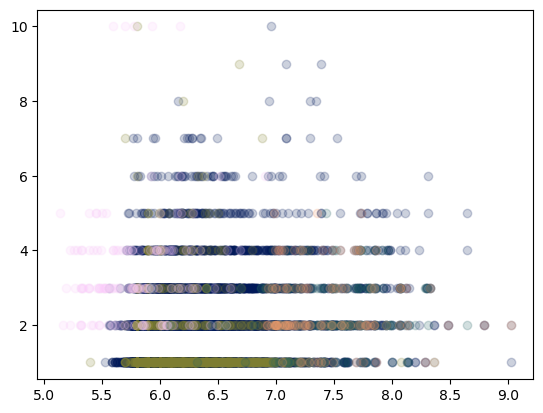

In [33]:
plt.scatter(df_2['magnitude'], df_2['scardec_opt_num_gaussians'],  alpha = 0.2, color = dataset_colors['scardec'])
plt.scatter(df_2['magnitude'], df_2['scardec_moy_num_gaussians'],  alpha = 0.2, color = dataset_colors['scardec'])
plt.scatter(df_2['magnitude'], df_2['sigloch_0_num_gaussians'],  alpha = 0.2, color = dataset_colors['sigloch'])
plt.scatter(df_2['magnitude'], df_2['isc_num_gaussians'],  alpha = 0.2, color = dataset_colors['isc'])
plt.scatter(df_2['magnitude'], df_2['usgs_num_gaussians'],  alpha = 0.2, color = dataset_colors['usgs'])
plt.scatter(df_2['magnitude'], df_2['ye_num_gaussians'],  alpha = 0.2, color = dataset_colors['ye'])

In [34]:
df_all = df.copy()

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6762: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6763: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


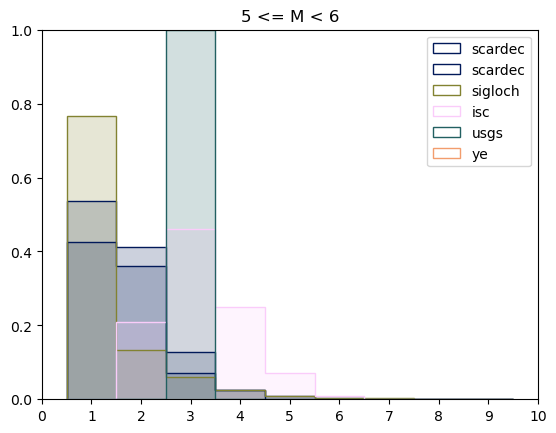

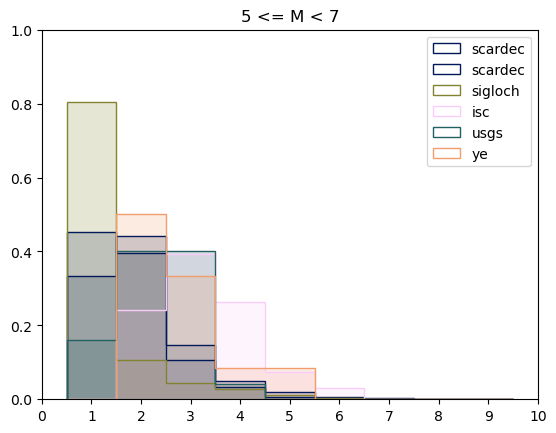

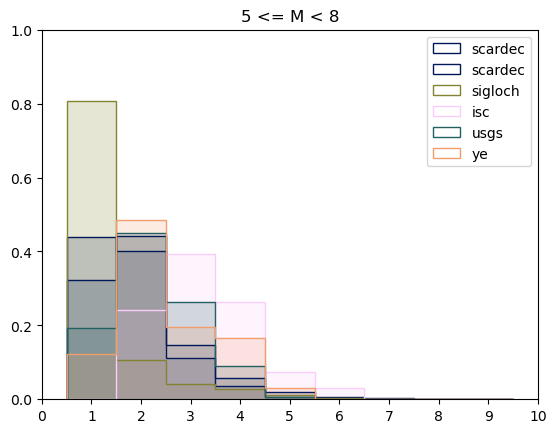

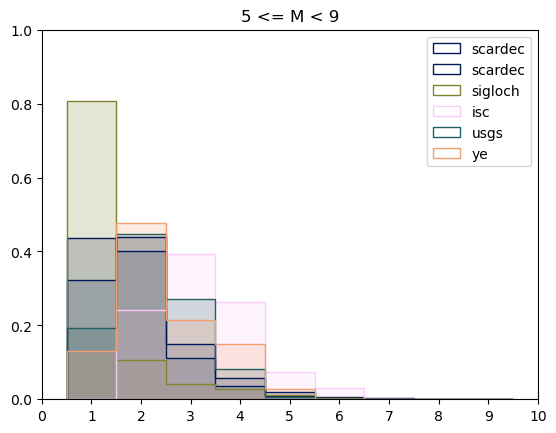

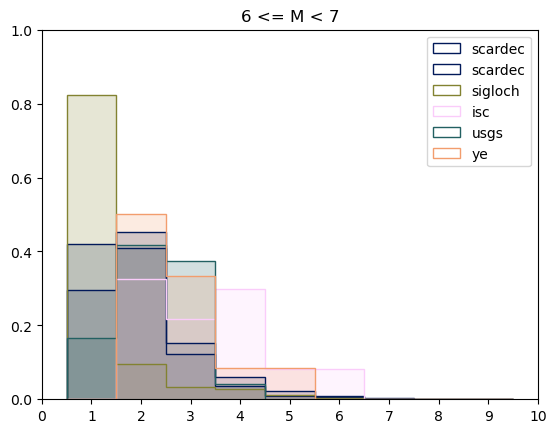

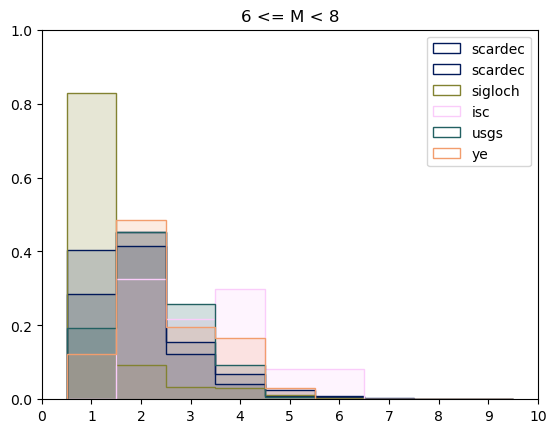

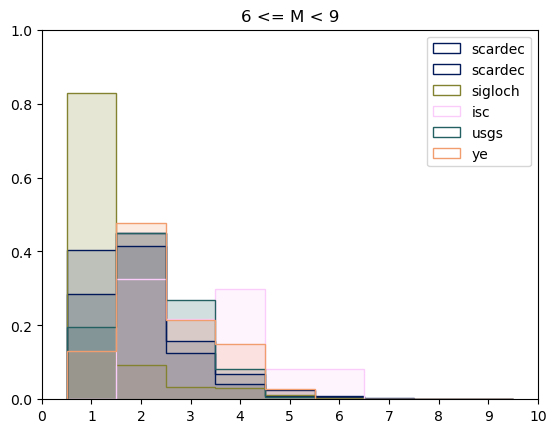

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6762: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6763: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


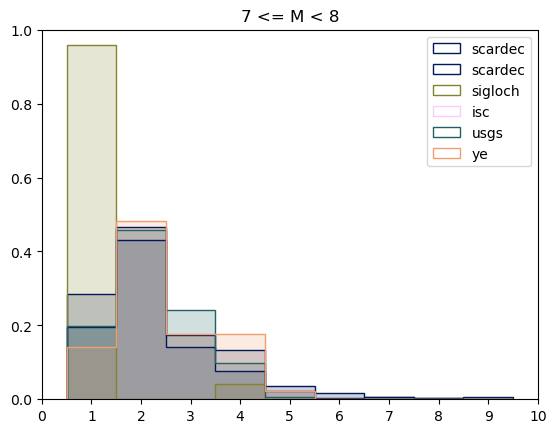

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6762: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6763: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


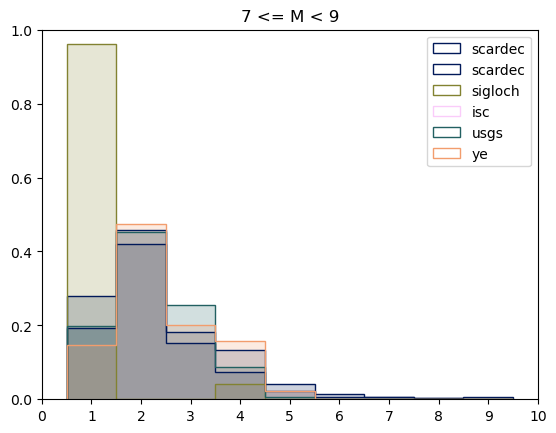

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6762: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/matplotlib/axes/_axes.py:6763: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


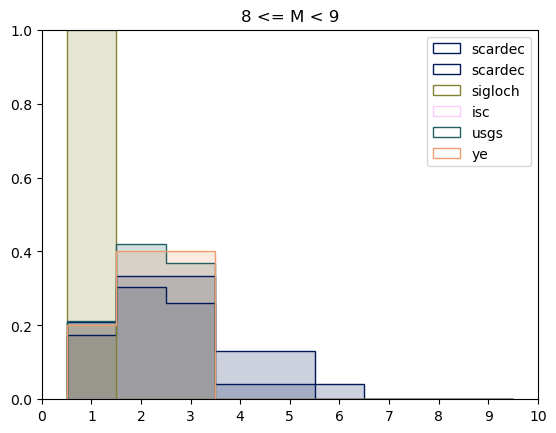

In [42]:
df = df_combined
df_mean = pd.DataFrame()
df_median = pd.DataFrame()
df_numbers = pd.DataFrame()
for LL in [5,6,7,8]:
	for UL in [6,7,8,9]:
		if UL <= LL:
			continue
		df = df_combined[(df_combined['magnitude'] < UL) & (df_combined['magnitude'] >= LL)]
		df = df[(df['scardec_opt_r2'] >= 0.95) | df['scardec_opt_r2'].isna()]
		df = df[(df['scardec_moy_r2'] >= 0.95) | df['scardec_moy_r2'].isna()]
		df = df[(df['ye_r2'] >= 0.95) | df['ye_r2'].isna()]
		df = df[(df['usgs_r2'] >= 0.95) | df['usgs_r2'].isna()]
		df = df[(df['isc_r2'] >= 0.95) | df['isc_r2'].isna()]
		df = df[(df['sigloch_0_r2'] >= 0.95) | df['sigloch_0_r2'].isna()]

		bins = np.arange(0.5, 10.5, 1)
		plt.hist(df['scardec_opt_num_gaussians'], bins = bins, alpha = 1, density = True, histtype = 'step', color = dataset_colors['scardec'], label = 'scardec')
		plt.hist(df['scardec_moy_num_gaussians'], bins = bins, alpha = 1, density = True, histtype = 'step', color = dataset_colors['scardec'], label = 'scardec')
		plt.hist(df['sigloch_0_num_gaussians'], bins = bins, alpha = 1, density = True, histtype = 'step', color = dataset_colors['sigloch'], label = 'sigloch')
		plt.hist(df['isc_num_gaussians'], bins = bins, alpha = 1, density = True, histtype = 'step', color = dataset_colors['isc'], label = 'isc')
		plt.hist(df['usgs_num_gaussians'], bins = bins, alpha = 1, density = True, histtype = 'step', color = dataset_colors['usgs'], label = 'usgs')
		plt.hist(df['ye_num_gaussians'], bins = bins, alpha = 1, density = True, histtype = 'step', color = dataset_colors['ye'], label = 'ye')


		plt.hist(df['scardec_opt_num_gaussians'], bins = bins, alpha = .2, density = True, histtype = 'bar', color = dataset_colors['scardec'])
		plt.hist(df['scardec_moy_num_gaussians'], bins = bins, alpha = .2, density = True, histtype = 'bar', color = dataset_colors['scardec'])
		plt.hist(df['sigloch_0_num_gaussians'], bins = bins, alpha = .2, density = True, histtype = 'bar', color = dataset_colors['sigloch'])
		plt.hist(df['isc_num_gaussians'], bins = bins, alpha = .2, density = True, histtype = 'bar', color = dataset_colors['isc'])
		plt.hist(df['usgs_num_gaussians'], bins = bins, alpha = .2, density = True, histtype = 'bar', color = dataset_colors['usgs'])
		plt.hist(df['ye_num_gaussians'], bins = bins, alpha = .2, density = True, histtype = 'bar', color = dataset_colors['ye'])

		plt.xticks(np.arange(0, 11, 1))
		plt.ylim(0, 1)
		plt.title(f'{LL} <= M < {UL}')
		plt.legend()

		df_mean[f'{LL}_{UL}'] = [np.mean(df['scardec_opt_num_gaussians']), np.mean(df['scardec_moy_num_gaussians']), np.mean(df['sigloch_0_num_gaussians']), np.mean(df['isc_num_gaussians']), np.mean(df['usgs_num_gaussians']), np.mean(df['ye_num_gaussians'])]
		df_median[f'{LL}_{UL}'] = [np.nanmedian(df['scardec_opt_num_gaussians']), np.nanmedian(df['scardec_moy_num_gaussians']), np.nanmedian(df['sigloch_0_num_gaussians']), np.nanmedian(df['isc_num_gaussians']), np.nanmedian(df['usgs_num_gaussians']), np.nanmedian(df['ye_num_gaussians'])]		
		df_numbers[f'{LL}_{UL}'] = [len(df[df['scardec_opt_num_gaussians'].notna()]), len(df[df['scardec_moy_num_gaussians'].notna()]), len(df[df['sigloch_0_num_gaussians'].notna()]), len(df[df['isc_num_gaussians'].notna()]), len(df[df['usgs_num_gaussians'].notna()]), len(df[df['ye_num_gaussians'].notna()])]
		plt.show()


In [50]:
df_numbers.index = ['scardec_opt', 'scardec_moy', 'sigloch_0', 'isc', 'usgs', 'ye']
df_numbers
print(df_numbers.to_latex(float_format="%.2f"))

\begin{tabular}{lrrrrrrrrrr}
\toprule
 & 5_6 & 5_7 & 5_8 & 5_9 & 6_7 & 6_8 & 6_9 & 7_8 & 7_9 & 8_9 \\
\midrule
scardec_opt & 1042 & 3561 & 3875 & 3898 & 2519 & 2833 & 2856 & 314 & 337 & 23 \\
scardec_moy & 966 & 3494 & 3822 & 3846 & 2528 & 2856 & 2880 & 328 & 352 & 24 \\
sigloch_0 & 348 & 1043 & 1067 & 1068 & 695 & 719 & 720 & 24 & 25 & 1 \\
isc & 100 & 137 & 137 & 137 & 37 & 37 & 37 & 0 & 0 & 0 \\
usgs & 1 & 25 & 187 & 206 & 24 & 186 & 205 & 162 & 181 & 19 \\
ye & 0 & 12 & 97 & 107 & 12 & 97 & 107 & 85 & 95 & 10 \\
\bottomrule
\end{tabular}



In [45]:
df_mean.index = ['scardec_opt', 'scardec_moy', 'sigloch_0', 'isc', 'usgs', 'ye']
print(df_mean.round(2))

              5_6   5_7   5_8   5_9   6_7   6_8   6_9   7_8   7_9   8_9
scardec_opt  1.80  2.02  2.06  2.06  2.11  2.15  2.16  2.51  2.53  2.74
scardec_moy  1.61  1.76  1.79  1.80  1.82  1.85  1.86  2.13  2.16  2.50
sigloch_0    1.42  1.37  1.36  1.36  1.34  1.33  1.33  1.12  1.12  1.00
isc          3.21  3.26  3.26  3.26  3.38  3.38  3.38   NaN   NaN   NaN
usgs         3.00  2.32  2.27  2.26  2.29  2.26  2.25  2.26  2.25  2.16
ye            NaN  2.75  2.49  2.47  2.75  2.49  2.47  2.46  2.43  2.20


In [49]:
print(df_mean.to_latex(float_format="%.2f"))

\begin{tabular}{lrrrrrrrrrr}
\toprule
 & 5_6 & 5_7 & 5_8 & 5_9 & 6_7 & 6_8 & 6_9 & 7_8 & 7_9 & 8_9 \\
\midrule
scardec_opt & 1.80 & 2.02 & 2.06 & 2.06 & 2.11 & 2.15 & 2.16 & 2.51 & 2.53 & 2.74 \\
scardec_moy & 1.61 & 1.76 & 1.79 & 1.80 & 1.82 & 1.85 & 1.86 & 2.13 & 2.16 & 2.50 \\
sigloch_0 & 1.42 & 1.37 & 1.36 & 1.36 & 1.34 & 1.33 & 1.33 & 1.12 & 1.12 & 1.00 \\
isc & 3.21 & 3.26 & 3.26 & 3.26 & 3.38 & 3.38 & 3.38 & NaN & NaN & NaN \\
usgs & 3.00 & 2.32 & 2.27 & 2.26 & 2.29 & 2.26 & 2.25 & 2.26 & 2.25 & 2.16 \\
ye & NaN & 2.75 & 2.49 & 2.47 & 2.75 & 2.49 & 2.47 & 2.46 & 2.43 & 2.20 \\
\bottomrule
\end{tabular}



In [46]:
df_median.index = ['scardec_opt', 'scardec_moy', 'sigloch_0', 'isc', 'usgs', 'ye']
df_median

,5_6,5_7,5_8,5_9,6_7,6_8,6_9,7_8,7_9,8_9
scardec_opt,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0
scardec_moy,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
sigloch_0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
isc,3.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN
usgs,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
ye,NaN,2.5,2.0,2.0,2.5,2.0,2.0,2.0,2.0,2.0


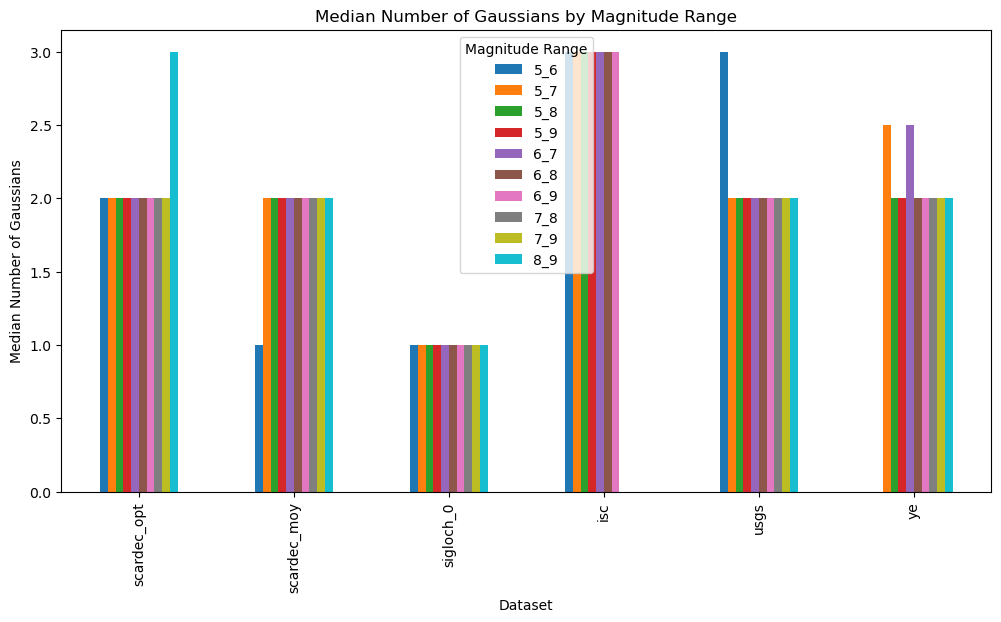

In [322]:
df_median.plot(kind='bar', figsize=(12, 6))
plt.title('Median Number of Gaussians by Magnitude Range')
plt.xlabel('Dataset')
plt.ylabel('Median Number of Gaussians')
plt.legend(title='Magnitude Range')
plt.show()

In [323]:
i

5

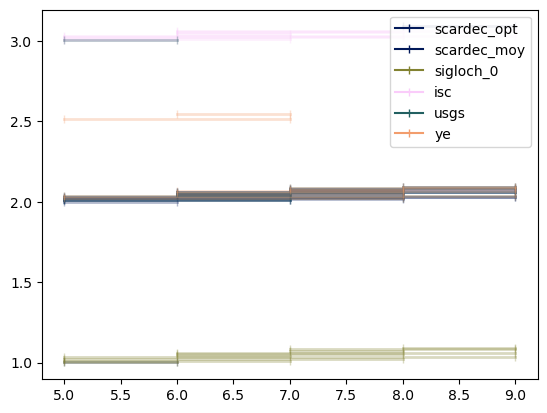

In [324]:
count = 0

marker_list = ['o', 's', 'D', 'v', '^', '<', '>', 'p', 'P', 'X', '.']
for i, row in df_median.iterrows():
	marker_index = 0
	bin_count = 0
	plt.plot([],[], label = i, color = dataset_colors[i.split('_')[0]], marker='|')
	for column in df_median.columns:
		plt.plot([int(column.split('_')[0]), int(column.split('_')[1])], 
		   		 [row[column]+count+bin_count, row[column]+count+bin_count], 
				 color = dataset_colors[i.split('_')[0]], marker="|", alpha = 0.3, linewidth = 2)#marker_list[marker_index])
		marker_index += 1
		bin_count += 0.01
		
		
	count += 0.001#0.1
	
	
# marker_index = 0
# for column in df_median.columns:
# 	plt.plot([],[], label = column, color = 'black', marker=marker_list[marker_index])
# 	marker_index += 1
plt.legend()

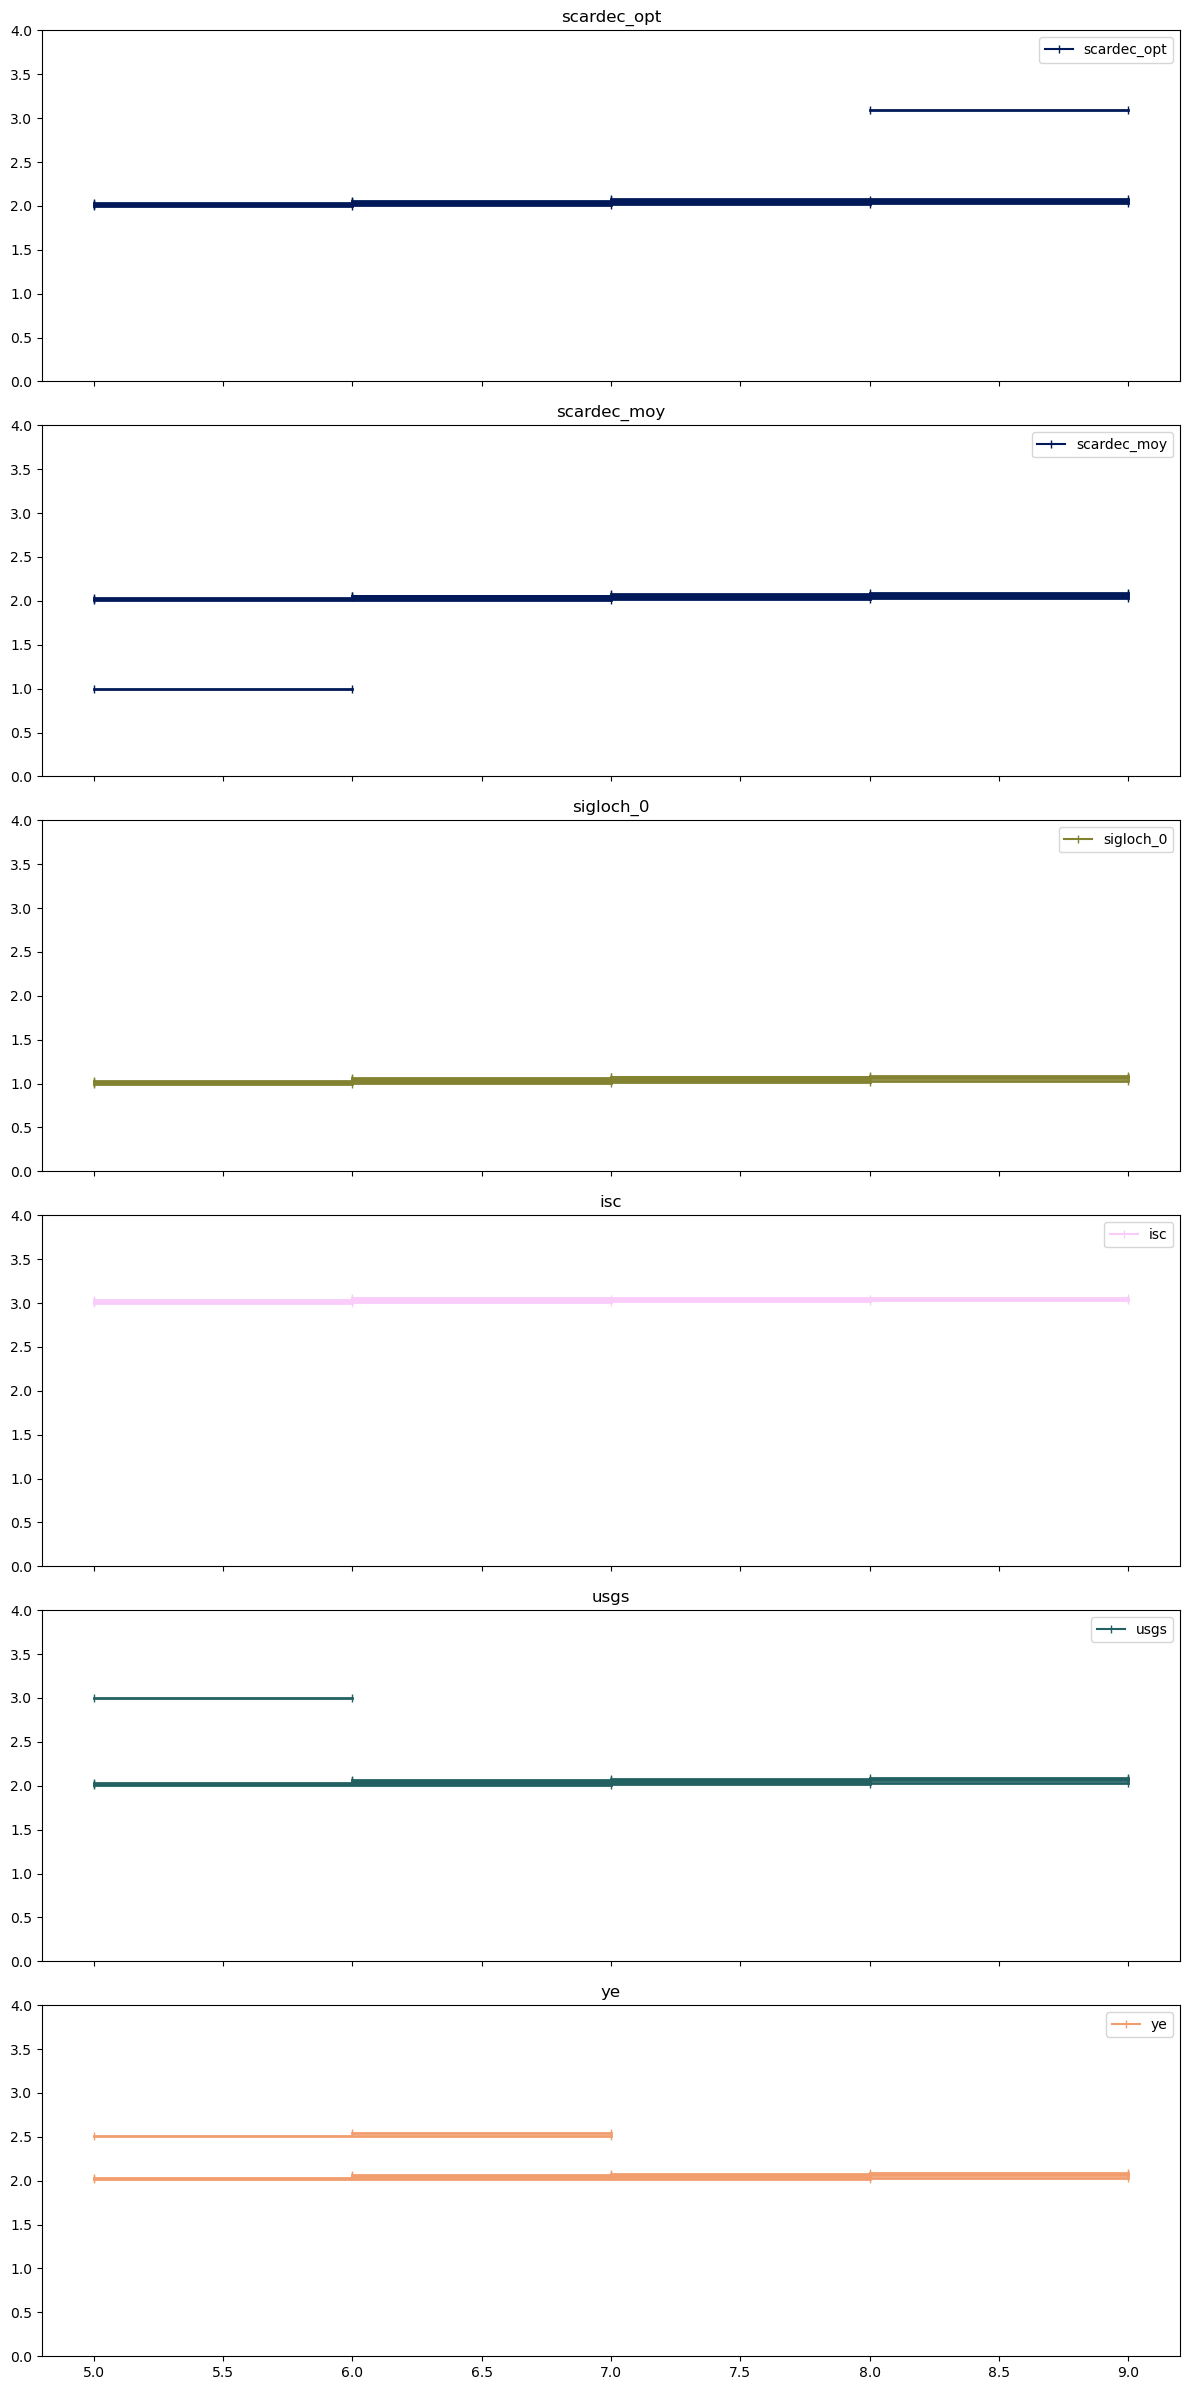

In [325]:
count = 0
marker_list = ['o', 's', 'D', 'v', '^', '<', '>', 'p', 'P', 'X', '.']

fig, axs = plt.subplots(len(df_median), 1, figsize=(12, len(df_median) * 4), sharex=True)

for ax, (i, row) in zip(axs, df_median.iterrows()):
	marker_index = 0
	bin_count = 0
	ax.plot([], [], label=i, color=dataset_colors[i.split('_')[0]], marker='|')
	for column in df_median.columns:
		ax.plot([int(column.split('_')[0]), int(column.split('_')[1])], 
				[row[column] + count + bin_count, row[column] + count + bin_count], 
				color=dataset_colors[i.split('_')[0]], marker="|", alpha=1, linewidth=2)
		marker_index += 1
		bin_count += 0.01
	ax.legend()
	ax.set_title(i)
	ax.set_ylim(0, 4)

plt.tight_layout()
plt.show()

In [36]:
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

In [37]:
lighten_color('g', 1.3)

(0.0, 0.04999999999999982, 0.0)

In [38]:
column

NameError: name 'column' is not defined

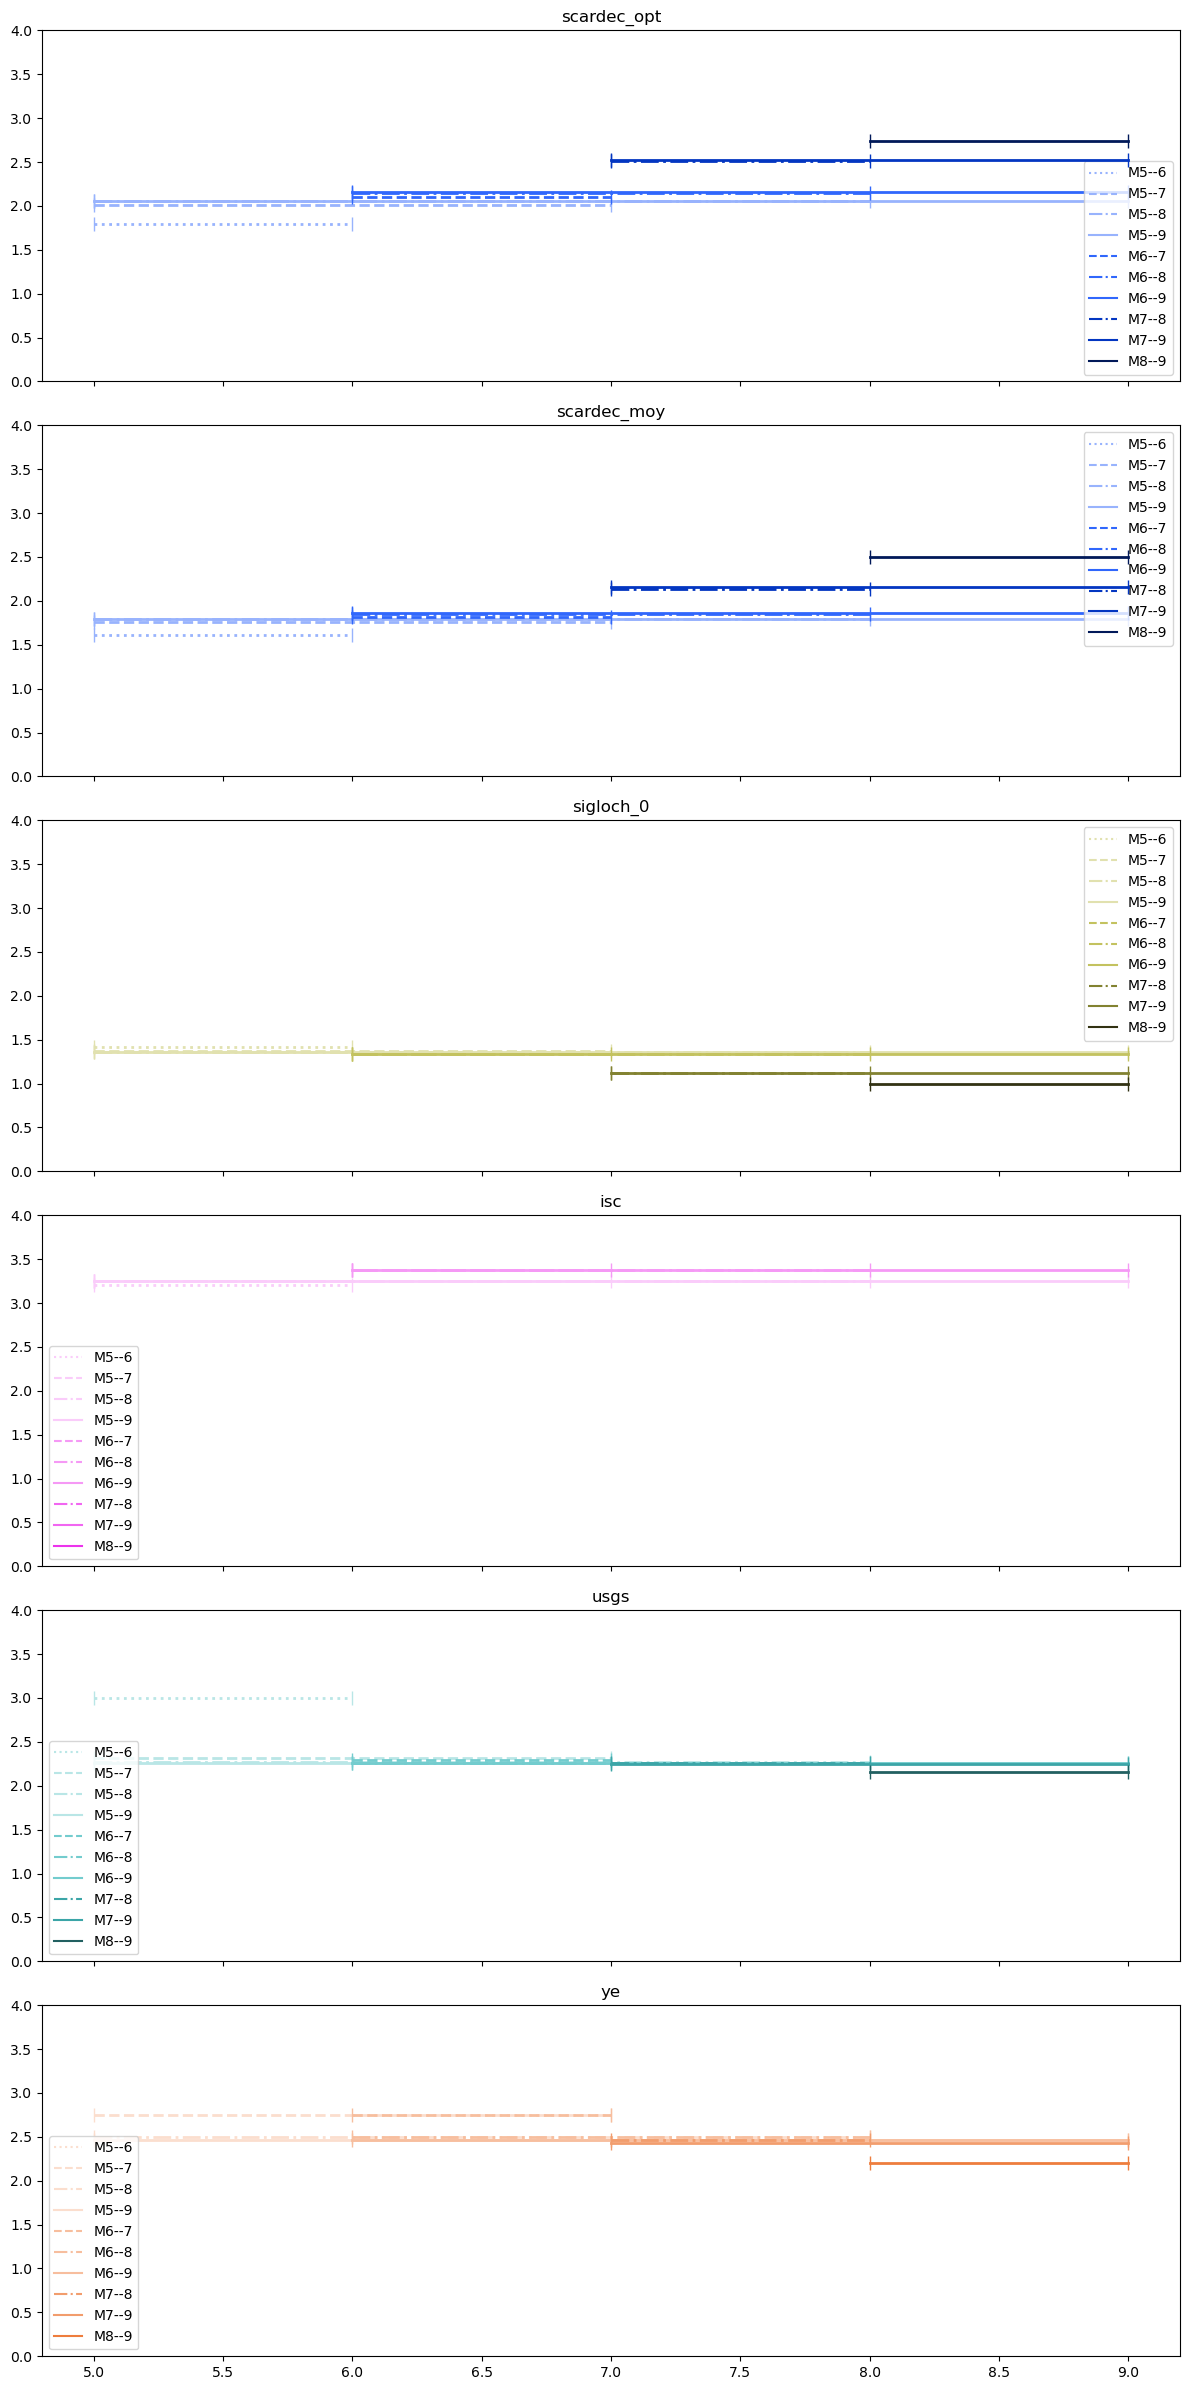

In [383]:
count = 0
marker_list = ['o', 's', 'D', 'v', '^', '<', '>', 'p', 'P', 'X', '.']
line_styles = {'5': ':', '6': ':', '7': '--', '8': '-.', '9': '-'}
fig, axs = plt.subplots(len(df_mean), 1, figsize=(12, len(df_mean) * 4), sharex=True)

for ax, (i, row) in zip(axs, df_mean.iterrows()):
	marker_index = 0
	bin_count = 0
	#ax.plot([], [], label=i, color=dataset_colors[i.split('_')[0]], marker='|')
	for column in df_mean.columns:
		lighten = (int(column.split('_')[0])-4)/5
		if row.name.startswith('scardec') or row.name.startswith('usgs'):
			lighten = (int(column.split('_')[0])-4)/4
		elif row.name.startswith('sigloch') or row.name.startswith('ye'):
			lighten = (int(column.split('_')[0])-4)/3
		elif row.name.startswith('isc'):
			lighten = (int(column.split('_')[0])-4)
		else:
			lighten = (int(column.split('_')[0])-4)/4
		ax.plot([int(column.split('_')[0]), int(column.split('_')[1])], 
				[row[column], row[column]], 
				color=lighten_color(dataset_colors[i.split('_')[0]], lighten),
				marker="|", alpha=1, linewidth=2, markersize=10, linestyle=line_styles[column.split('_')[1]],
				zorder = int(lighten*10))
		ax.plot([],[], label = f"M{column.split('_')[0]}--{column.split('_')[1]}", color = lighten_color(dataset_colors[i.split('_')[0]], lighten), linestyle=line_styles[column.split('_')[1]])
		marker_index += 1
		bin_count += 0.01
	ax.legend()
	ax.set_title(i)
	ax.set_ylim(0, 4)

plt.tight_layout()
plt.savefig('/home/earthquakes1/homes/Rebecca/phd/stf/figures/large_scale_peaks_all/results_95_threshold/mean_gaussians_by_magnitude_range_only_no_zoom.png')

plt.show()

In [330]:
column

'8_9'

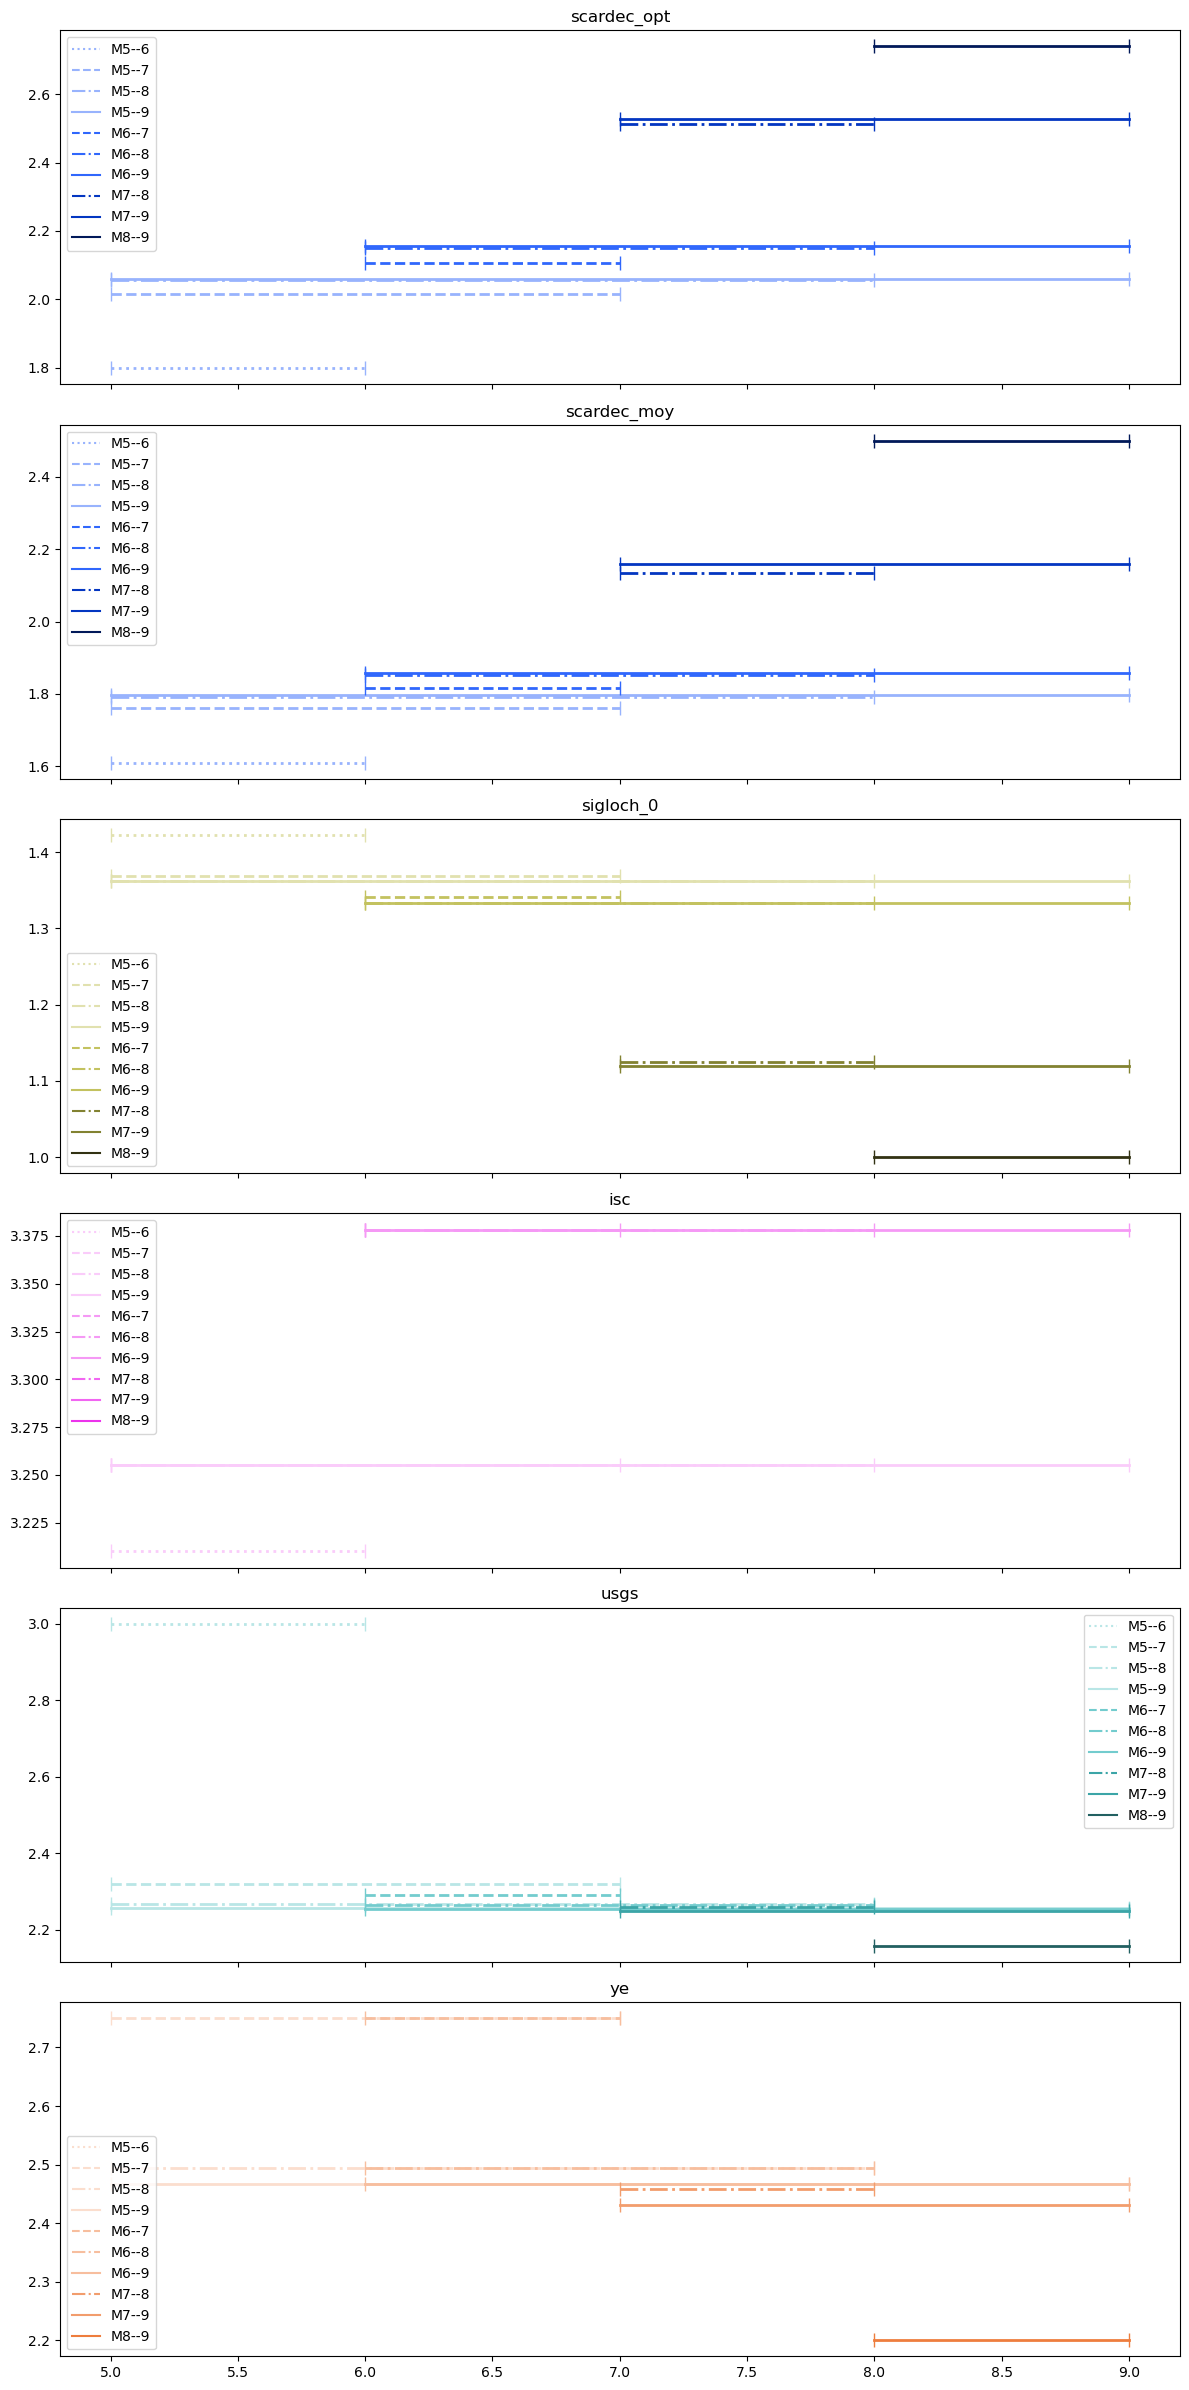

In [382]:
count = 0
marker_list = ['o', 's', 'D', 'v', '^', '<', '>', 'p', 'P', 'X', '.']
line_styles = {'5': ':', '6': ':', '7': '--', '8': '-.', '9': '-'}
fig, axs = plt.subplots(len(df_mean), 1, figsize=(12, len(df_mean) * 4), sharex=True)

for ax, (i, row) in zip(axs, df_mean.iterrows()):
	marker_index = 0
	bin_count = 0
	#ax.plot([], [], label=i, color=dataset_colors[i.split('_')[0]], marker='|')
	for column in df_mean.columns:
		lighten = (int(column.split('_')[0])-4)/5
		if row.name.startswith('scardec') or row.name.startswith('usgs'):
			lighten = (int(column.split('_')[0])-4)/4
		elif row.name.startswith('sigloch') or row.name.startswith('ye'):
			lighten = (int(column.split('_')[0])-4)/3
		elif row.name.startswith('isc'):
			lighten = (int(column.split('_')[0])-4)
		else:
			lighten = (int(column.split('_')[0])-4)/4
		ax.plot([int(column.split('_')[0]), int(column.split('_')[1])], 
				[row[column], row[column]], 
				color=lighten_color(dataset_colors[i.split('_')[0]], lighten),
				marker="|", alpha=1, linewidth=2, markersize=10, linestyle=line_styles[column.split('_')[1]],
				zorder = int(lighten*10))
		ax.plot([],[], label = f"M{column.split('_')[0]}--{column.split('_')[1]}", color = lighten_color(dataset_colors[i.split('_')[0]], lighten), linestyle=line_styles[column.split('_')[1]])
		marker_index += 1
		bin_count += 0.01
	ax.legend()
	ax.set_title(i)
	#ax.set_ylim(0, 4)

plt.tight_layout()
plt.savefig('/home/earthquakes1/homes/Rebecca/phd/stf/figures/large_scale_peaks_all/results_95_threshold/mean_gaussians_by_magnitude_range_only_zoom.png')
plt.show()

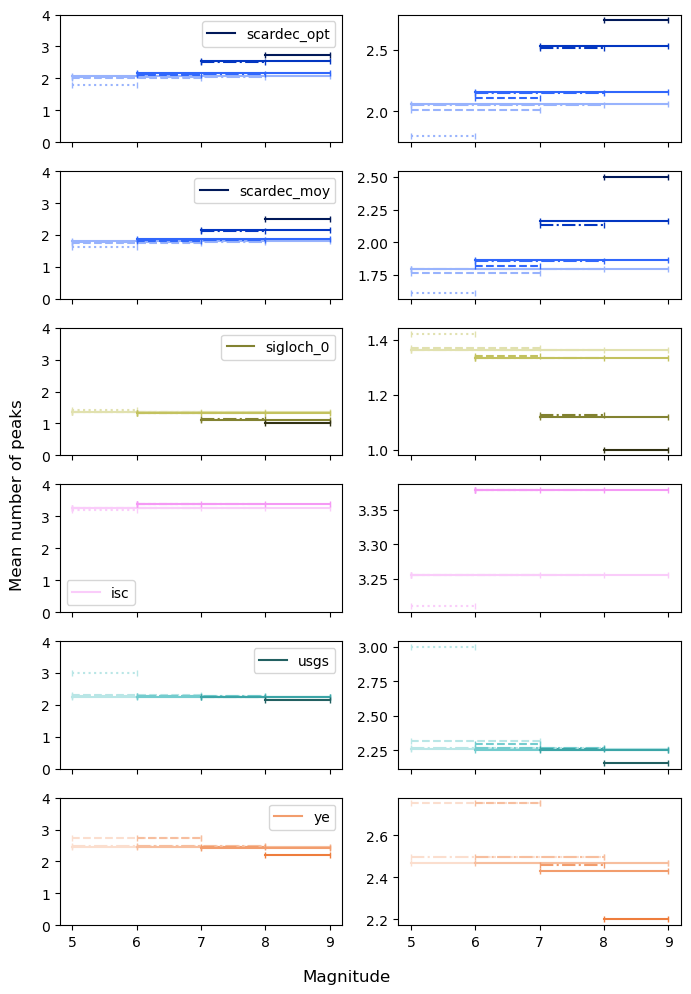

In [380]:
count = 0
marker_list = ['o', 's', 'D', 'v', '^', '<', '>', 'p', 'P', 'X', '.']
line_styles = {'5': ':', '6': ':', '7': '--', '8': '-.', '9': '-'}
fig, axs = plt.subplots(len(df_mean), 2, figsize=(7, 10), sharex=True)

for ax, (i, row) in zip(axs, df_mean.iterrows()):
	marker_index = 0
	bin_count = 0
	for column in df_mean.columns:
		lighten = (int(column.split('_')[0])-4)/5
		if row.name.startswith('scardec') or row.name.startswith('usgs'):
			lighten = (int(column.split('_')[0])-4)/4
		elif row.name.startswith('sigloch') or row.name.startswith('ye'):
			lighten = (int(column.split('_')[0])-4)/3
		elif row.name.startswith('isc'):
			lighten = (int(column.split('_')[0])-4)
		else:
			lighten = (int(column.split('_')[0])-4)/4
		ax[0].plot([int(column.split('_')[0]), int(column.split('_')[1])], 
				   [row[column], row[column]], 
				   color=lighten_color(dataset_colors[i.split('_')[0]], lighten),
				   marker="|",  markersize=5, linestyle=line_styles[column.split('_')[1]],
				   zorder=int(lighten*10))
		#ax[0].plot([], [], label=f"M{column.split('_')[0]}--{column.split('_')[1]}", color=lighten_color(dataset_colors[i.split('_')[0]], lighten), linestyle=line_styles[column.split('_')[1]])
		ax[1].plot([int(column.split('_')[0]), int(column.split('_')[1])], 
				   [row[column], row[column]], 
				   color=lighten_color(dataset_colors[i.split('_')[0]], lighten),
				   marker="|",  markersize=5, linestyle=line_styles[column.split('_')[1]],
				   zorder=int(lighten*10))
		#ax[1].plot([], [], label=f"M{column.split('_')[0]}--{column.split('_')[1]}", color=lighten_color(dataset_colors[i.split('_')[0]], lighten), linestyle=line_styles[column.split('_')[1]])
		
		marker_index += 1
		bin_count += 0.01
	ax[0].plot([], [], label=i, color=dataset_colors[i.split('_')[0]])
	ax[0].set_ylim(0, 4)
	ax[0].legend()

fig.supylabel('Mean number of peaks')
fig.supxlabel('Magnitude')

plt.tight_layout()
plt.savefig('/home/earthquakes1/homes/Rebecca/phd/stf/figures/large_scale_peaks_all/results_95_threshold/mean_number_of_peaks_by_magnitude_range.png', bbox_inches='tight')
plt.show()


0
0
1
1
2
2
3
3
4
4
5
5


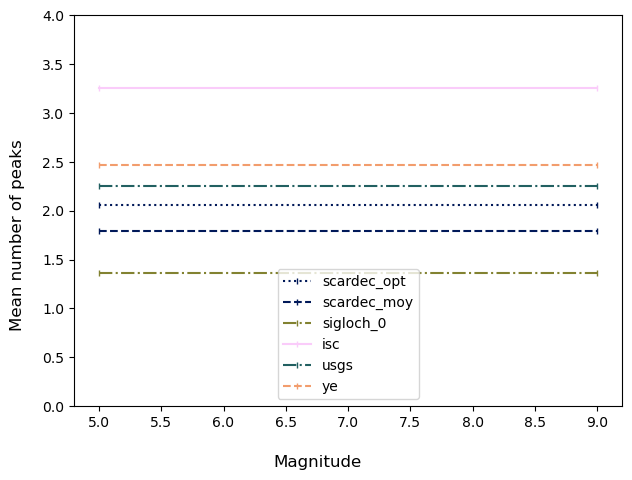

In [381]:
count = 0
marker_list = ['o', 's', 'D', 'v', '^', '<', '>', 'p', 'P', 'X', '.']
line_styles = [':', '--', '-.', '-', '-.', '--', '-.', ':', '-', '--', '-.', ':']
fig, ax = plt.subplots(1, 1)

marker_index = 0
for i, row in df_mean.iterrows():
	#print(i)
	
	bin_count = 0
	column = '5_9'
	print(marker_index)
	ax.plot([int(column.split('_')[0]), int(column.split('_')[1])], 
				[row[column], row[column]], 
				color=dataset_colors[i.split('_')[0]],
				marker="|",  markersize=5, linestyle=line_styles[marker_index], label=i)
	print(marker_index)

	marker_index += 1
	bin_count += 0.01
	#ax.plot([], [], label=i, color=dataset_colors[i.split('_')[0]])
ax.set_ylim(0, 4)
ax.legend()

fig.supylabel('Mean number of peaks')
fig.supxlabel('Magnitude')

plt.tight_layout()
plt.savefig('/home/earthquakes1/homes/Rebecca/phd/stf/figures/large_scale_peaks_all/results_95_threshold/mean_number_of_peaks_by_all_mags_by_dataset.png', bbox_inches='tight')
plt.show()


In [349]:
row

5_6    1.798464
5_7    2.015445
5_8    2.055742
5_9    2.059774
6_7    2.105200
6_8    2.150371
6_9    2.155112
7_8    2.512739
7_9    2.528190
8_9    2.739130
Name: scardec_opt, dtype: float64

In [347]:
df = df_combined.copy()
df = df[(df['scardec_opt_r2'] >= 0.95) | df['scardec_opt_r2'].isna()]
df = df[(df['scardec_moy_r2'] >= 0.95) | df['scardec_moy_r2'].isna()]
df = df[(df['ye_r2'] >= 0.95) | df['ye_r2'].isna()]
df = df[(df['usgs_r2'] >= 0.95) | df['usgs_r2'].isna()]
df = df[(df['isc_r2'] >= 0.95) | df['isc_r2'].isna()]
df = df[(df['sigloch_0_r2'] >= 0.95) | df['sigloch_0_r2'].isna()]

In [338]:
df

,event,scardec_opt_r2,scardec_opt_num_gaussians,scardec_moy_r2,scardec_moy_num_gaussians,ye_r2,ye_num_gaussians,usgs_r2,usgs_num_gaussians,isc_r2,...,sigloch_5_num_gaussians,sigloch_6_r2,sigloch_6_num_gaussians,sigloch_7_r2,sigloch_7_num_gaussians,sigloch_8_r2,sigloch_8_num_gaussians,sigloch_9_r2,sigloch_9_num_gaussians,magnitude
0,19900405_2112,NaN,NaN,NaN,NaN,NaN,NaN,0.987088,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19900418_1339,NaN,NaN,NaN,NaN,NaN,NaN,0.979903,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19901230_1914,NaN,NaN,NaN,NaN,NaN,NaN,0.987941,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19910422_2156,NaN,NaN,NaN,NaN,NaN,NaN,0.950683,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19910620_0518,NaN,NaN,NaN,NaN,NaN,NaN,0.964507,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4526,20240719_0150,NaN,NaN,NaN,NaN,NaN,NaN,0.992794,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4527,20240808_0742,NaN,NaN,NaN,NaN,NaN,NaN,0.989471,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4528,20241110_1649,NaN,NaN,NaN,NaN,NaN,NaN,0.960548,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4529,20241205_1844,NaN,NaN,NaN,NaN,NaN,NaN,0.964769,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
datasets = ['scardec_opt', 'scardec_moy', 'ye', 'usgs', 'isc', 'sigloch_0']

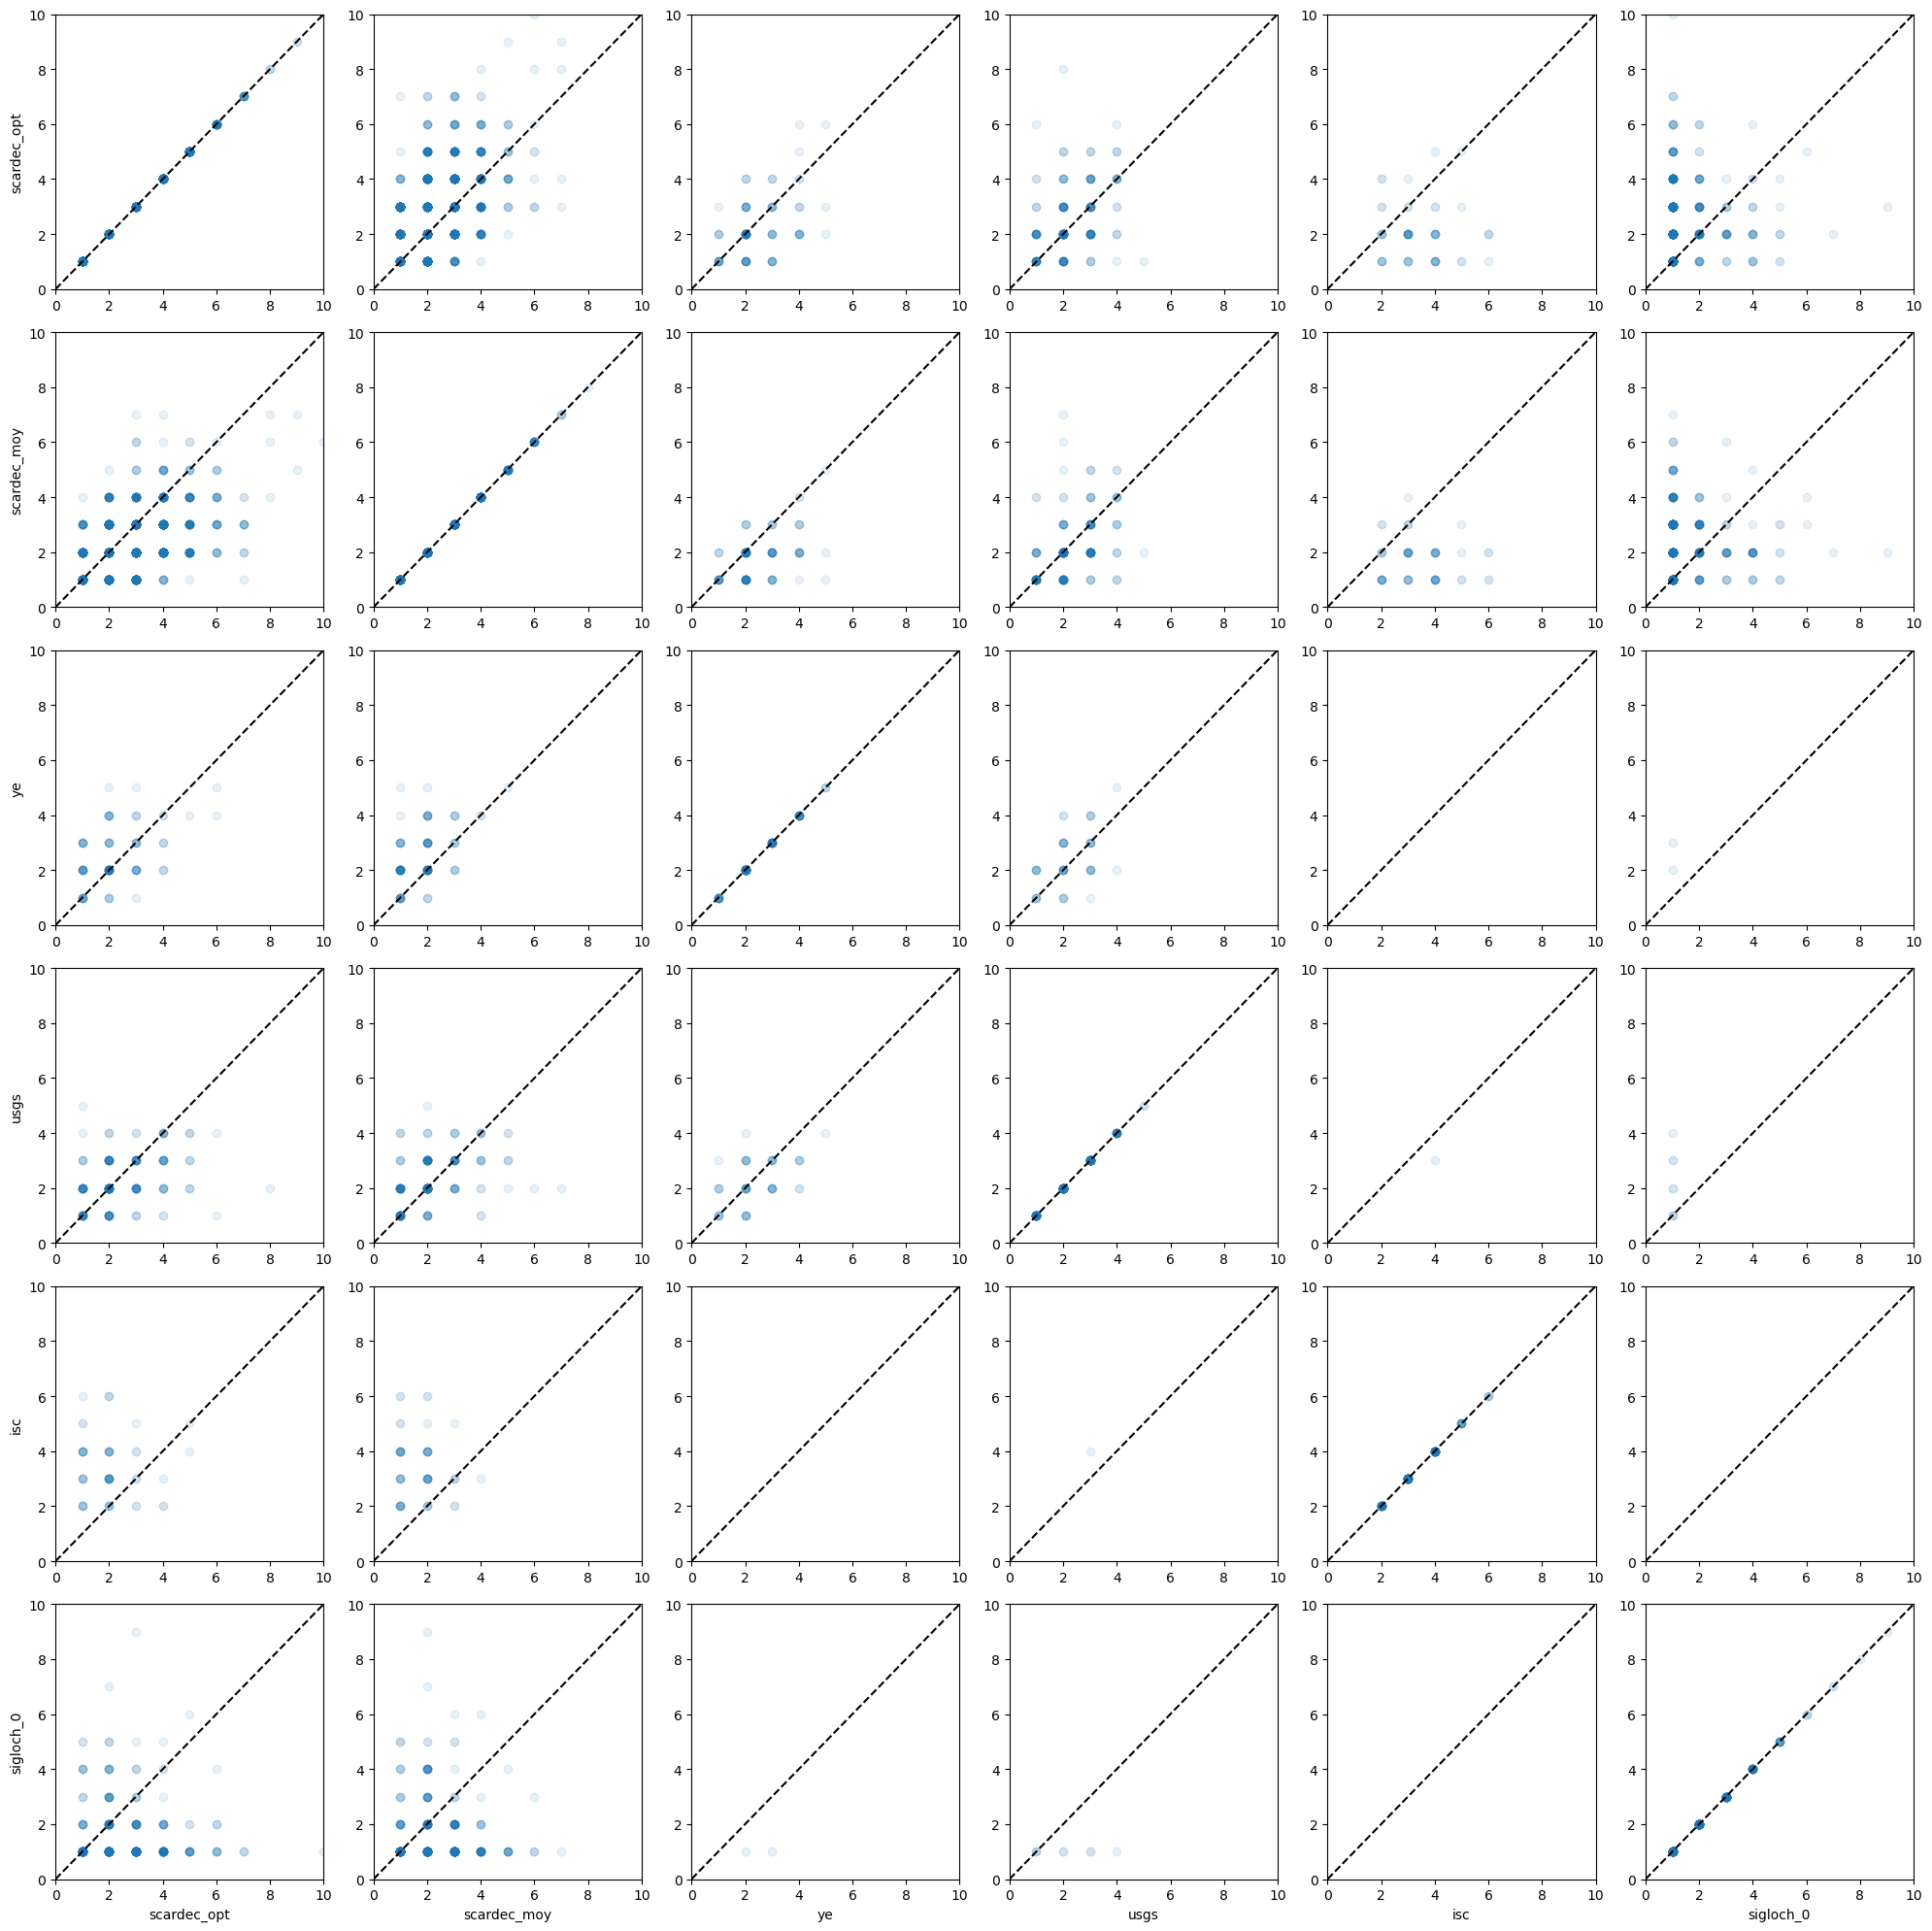

In [378]:
fig, axs = plt.subplots(len(datasets), len(datasets), figsize=(20, 20))
for i in range(0, len(datasets)):
	for j in range(0, len(datasets)):
		axs[i][j].scatter(df[datasets[j]+'_num_gaussians'], df[datasets[i]+'_num_gaussians'], alpha = 0.1)
		axs[i][j].set_xlim(0, 10)
		axs[i][j].set_ylim(0, 10)
		# axs[i][j].set_xlabel(datasets[j])
		# axs[i][j].set_ylabel(datasets[i])
		if i == 5:
			axs[i][j].set_xlabel(datasets[j])
		if j == 0:
			axs[i][j].set_ylabel(datasets[i])
		axs[i][j].plot([0, 10], [0, 10], color='black', linestyle='--')
plt.tight_layout()
plt.savefig('/home/earthquakes1/homes/Rebecca/phd/stf/figures/large_scale_peaks_all/results_95_threshold/num_gaussians_different_datasets.png', bbox_inches='tight')

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/numpy/lib/histograms.py:1065: RuntimeWarning: invalid value encountered in divide
  hist /= s


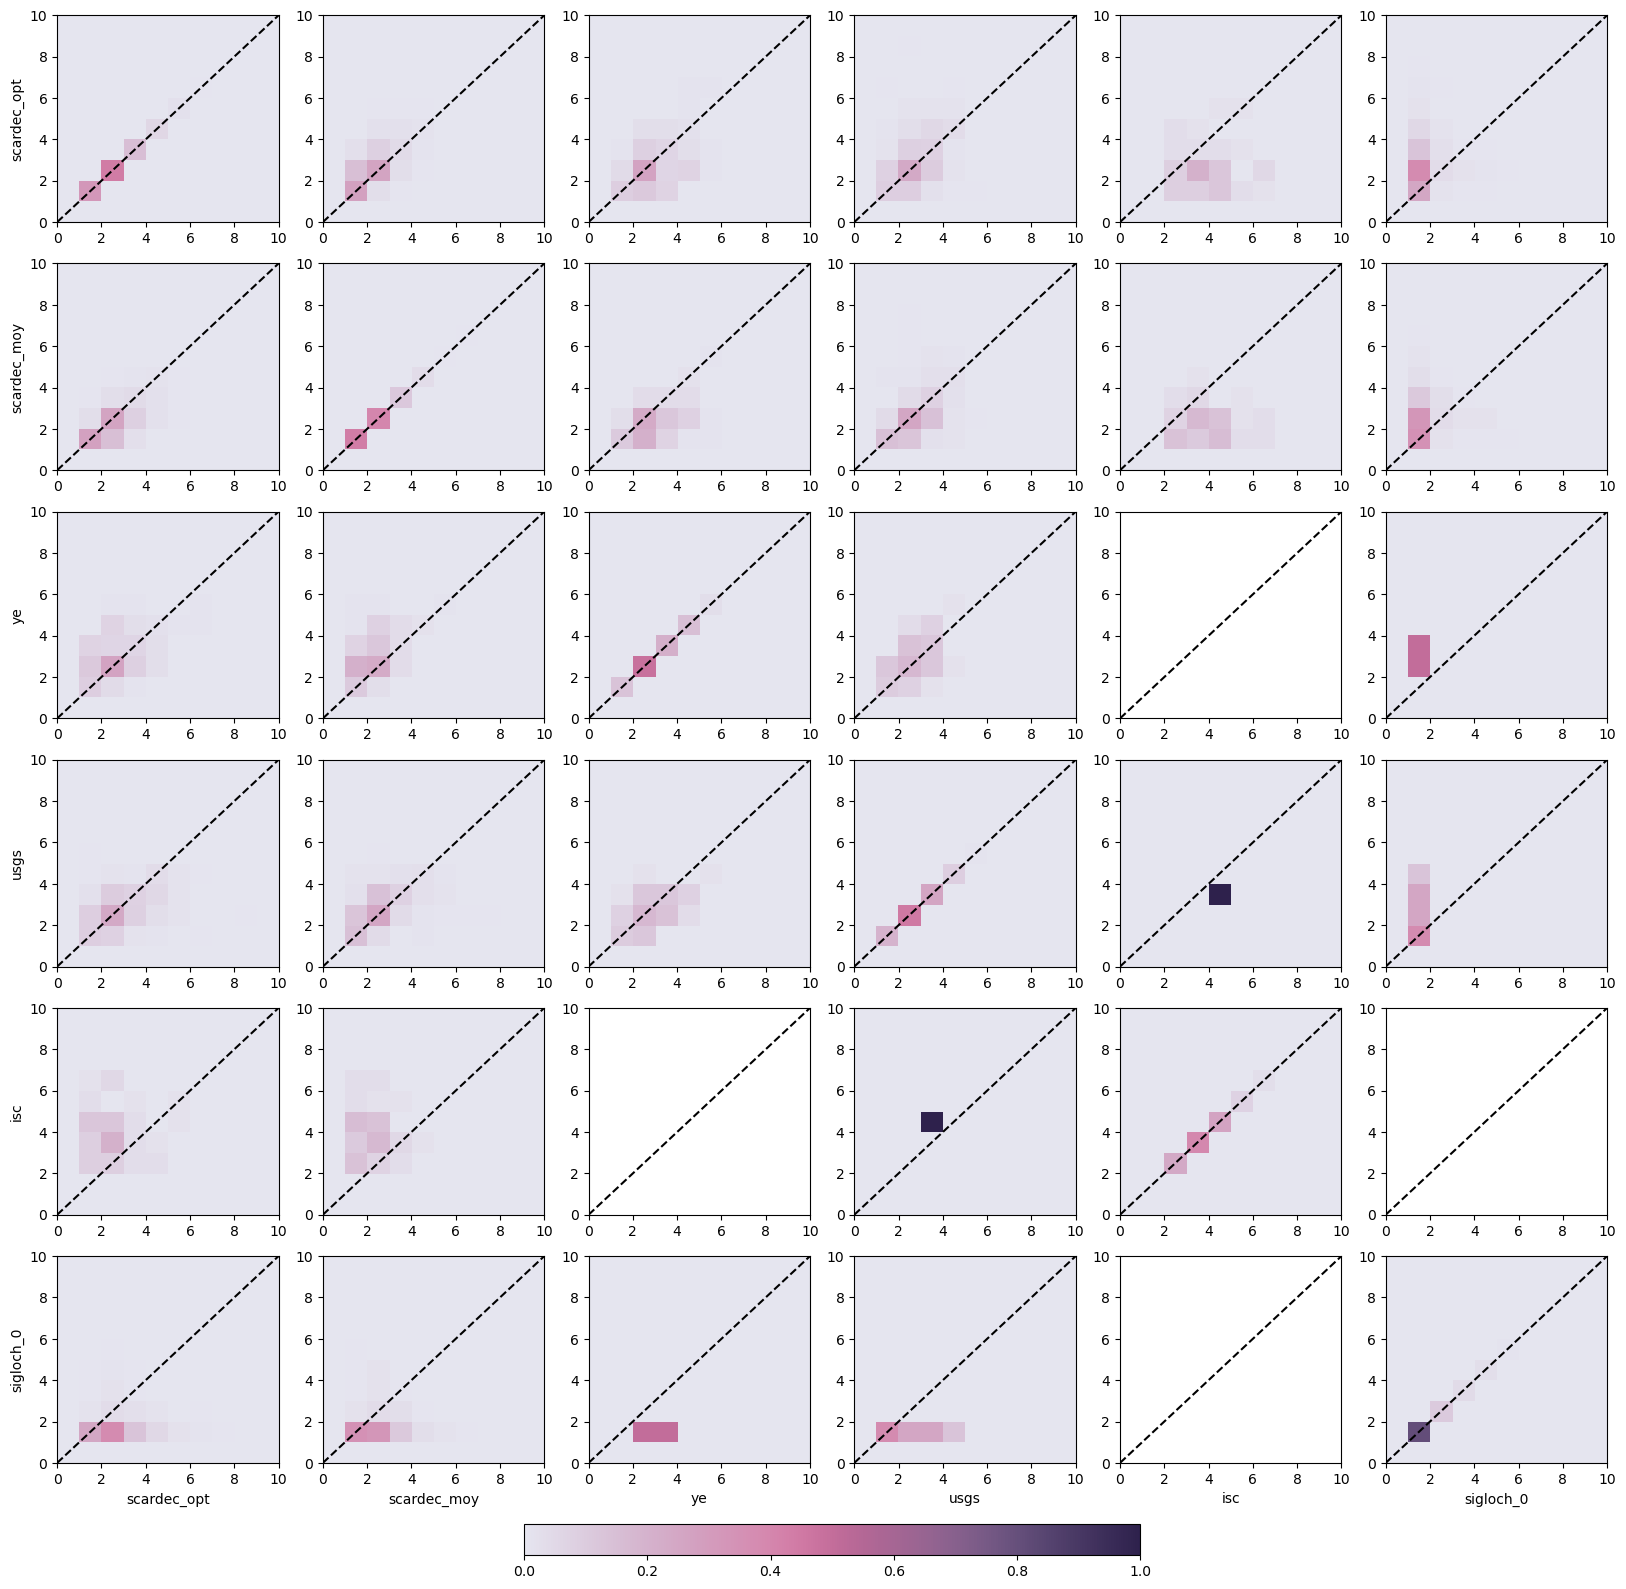

In [379]:
fig, axs = plt.subplots(len(datasets), len(datasets), figsize=(20, 20))
for i in range(len(datasets)):
	for j in range(len(datasets)):
		hist, xedges, yedges = np.histogram2d(df[datasets[j]+'_num_gaussians'], df[datasets[i]+'_num_gaussians'], bins=10, range=[[0, 10], [0, 10]], density=True)
		extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
		im = axs[i][j].imshow(hist.T, extent=extent, origin='lower', aspect='auto', cmap=cmc.acton_r, vmin=0, vmax=1)
		axs[i][j].set_xlim(0, 10)
		axs[i][j].set_ylim(0, 10)
		if i == len(datasets) - 1:
			axs[i][j].set_xlabel(datasets[j])
		if j == 0:
			axs[i][j].set_ylabel(datasets[i])

		axs[i][j].plot([0, 10], [0, 10], 'k--')
fig.colorbar(im, ax=axs, orientation='horizontal', fraction=0.02, pad=0.04)
plt.savefig('/home/earthquakes1/homes/Rebecca/phd/stf/figures/large_scale_peaks_all/results_95_threshold/num_gaussians_different_datasets_heatmap.png', bbox_inches='tight')
#plt.tight_layout()

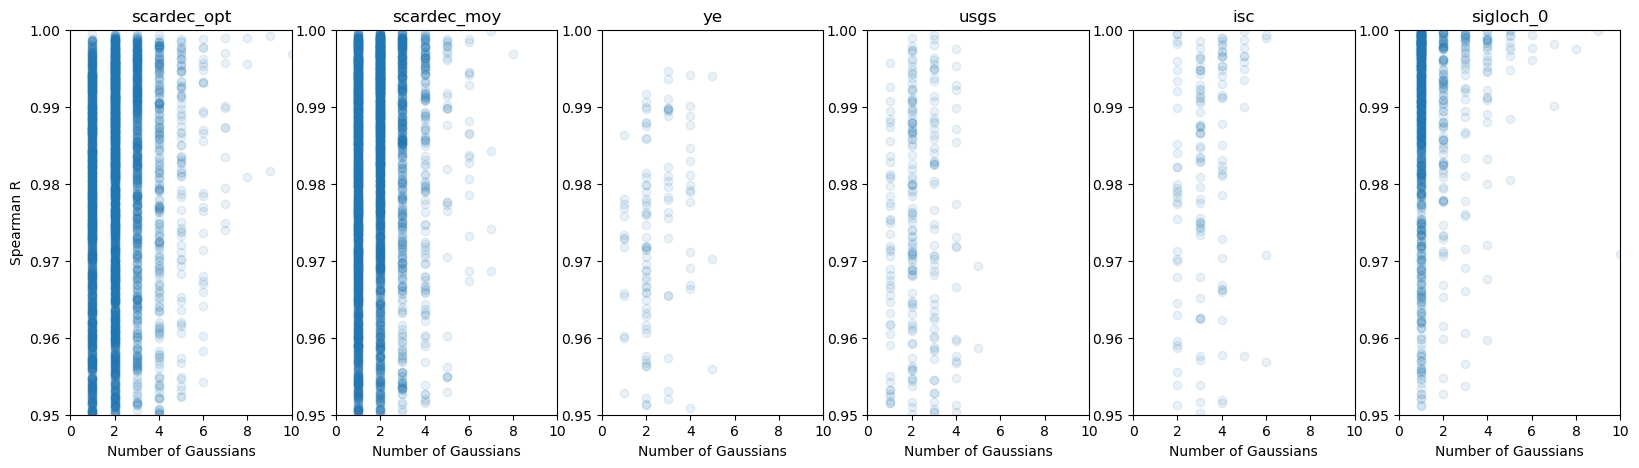

In [377]:
fig, axs = plt.subplots(1, len(datasets), figsize=(20, 5))
for i, dataset in enumerate(datasets):
	axs[i].scatter(df[dataset+'_num_gaussians'], df[dataset+'_r2'], alpha = 0.1)
	axs[i].set_xlim(0, 10)
	axs[i].set_title(dataset)
	axs[i].set_xlabel('Number of Gaussians')
	axs[i].set_ylim(0.95, 1)
axs[0].set_ylabel('Spearman R')
plt.savefig('/home/earthquakes1/homes/Rebecca/phd/stf/figures/large_scale_peaks_all/results_95_threshold/num_gaussians_vs_r2.png', bbox_inches='tight')

In [1]:
df_mean

NameError: name 'df_mean' is not defined

In [ ]:
count = 0
marker_list = ['o', 's', 'D', 'v', '^', '<', '>', 'p', 'P', 'X', '.']
line_styles = {'5': ':', '6': ':', '7': '--', '8': '-.', '9': '-'}
fig, axs = plt.subplots(len(df_mean), 2, figsize=(7, 10), sharex=True)

for ax, (i, row) in zip(axs, df_mean.iterrows()):
	marker_index = 0
	bin_count = 0
	for column in df_mean.columns:
		lighten = (int(column.split('_')[0])-4)/5
		if row.name.startswith('scardec') or row.name.startswith('usgs'):
			lighten = (int(column.split('_')[0])-4)/4
		elif row.name.startswith('sigloch') or row.name.startswith('ye'):
			lighten = (int(column.split('_')[0])-4)/3
		elif row.name.startswith('isc'):
			lighten = (int(column.split('_')[0])-4)
		else:
			lighten = (int(column.split('_')[0])-4)/4
		ax[0].plot([int(column.split('_')[0]), int(column.split('_')[1])], 
				   [row[column], row[column]], 
				   color=lighten_color(dataset_colors[i.split('_')[0]], lighten),
				   marker="|",  markersize=5, linestyle=line_styles[column.split('_')[1]],
				   zorder=int(lighten*10))
		#ax[0].plot([], [], label=f"M{column.split('_')[0]}--{column.split('_')[1]}", color=lighten_color(dataset_colors[i.split('_')[0]], lighten), linestyle=line_styles[column.split('_')[1]])
		ax[1].plot([int(column.split('_')[0]), int(column.split('_')[1])], 
				   [row[column], row[column]], 
				   color=lighten_color(dataset_colors[i.split('_')[0]], lighten),
				   marker="|",  markersize=5, linestyle=line_styles[column.split('_')[1]],
				   zorder=int(lighten*10))
		#ax[1].plot([], [], label=f"M{column.split('_')[0]}--{column.split('_')[1]}", color=lighten_color(dataset_colors[i.split('_')[0]], lighten), linestyle=line_styles[column.split('_')[1]])
		
		marker_index += 1
		bin_count += 0.01


In [39]:
df_mean

NameError: name 'df_mean' is not defined

In [88]:
from scipy.stats import spearmanr

scardec_opt vs scardec_opt
5525 5525
scardec_opt vs scardec_moy
5249 5249
scardec_opt vs ye
139 139
scardec_opt vs usgs
271 271
scardec_opt vs isc
75 75
scardec_opt vs sigloch_0
960 960
scardec_moy vs scardec_opt
5249 5249
scardec_moy vs scardec_moy
5458 5458
scardec_moy vs ye
144 144
scardec_moy vs usgs
279 279
scardec_moy vs isc
75 75
scardec_moy vs sigloch_0
968 968
ye vs scardec_opt
139 139
ye vs scardec_moy
144 144
ye vs ye
148 148
ye vs usgs
75 75
ye vs isc
0 0
ye vs sigloch_0
2 2
usgs vs scardec_opt
271 271
usgs vs scardec_moy
279 279
usgs vs ye
75 75
usgs vs usgs
311 311
usgs vs isc
1 1
usgs vs sigloch_0
9 9
isc vs scardec_opt
75 75
isc vs scardec_moy
75 75
isc vs ye
0 0
isc vs usgs
1 1


/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3508: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc5/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3508: RankWarn

isc vs isc
156 156
isc vs sigloch_0
0 0
sigloch_0 vs scardec_opt
960 960
sigloch_0 vs scardec_moy
968 968
sigloch_0 vs ye
2 2
sigloch_0 vs usgs
9 9
sigloch_0 vs isc
0 0
sigloch_0 vs sigloch_0
1367 1367


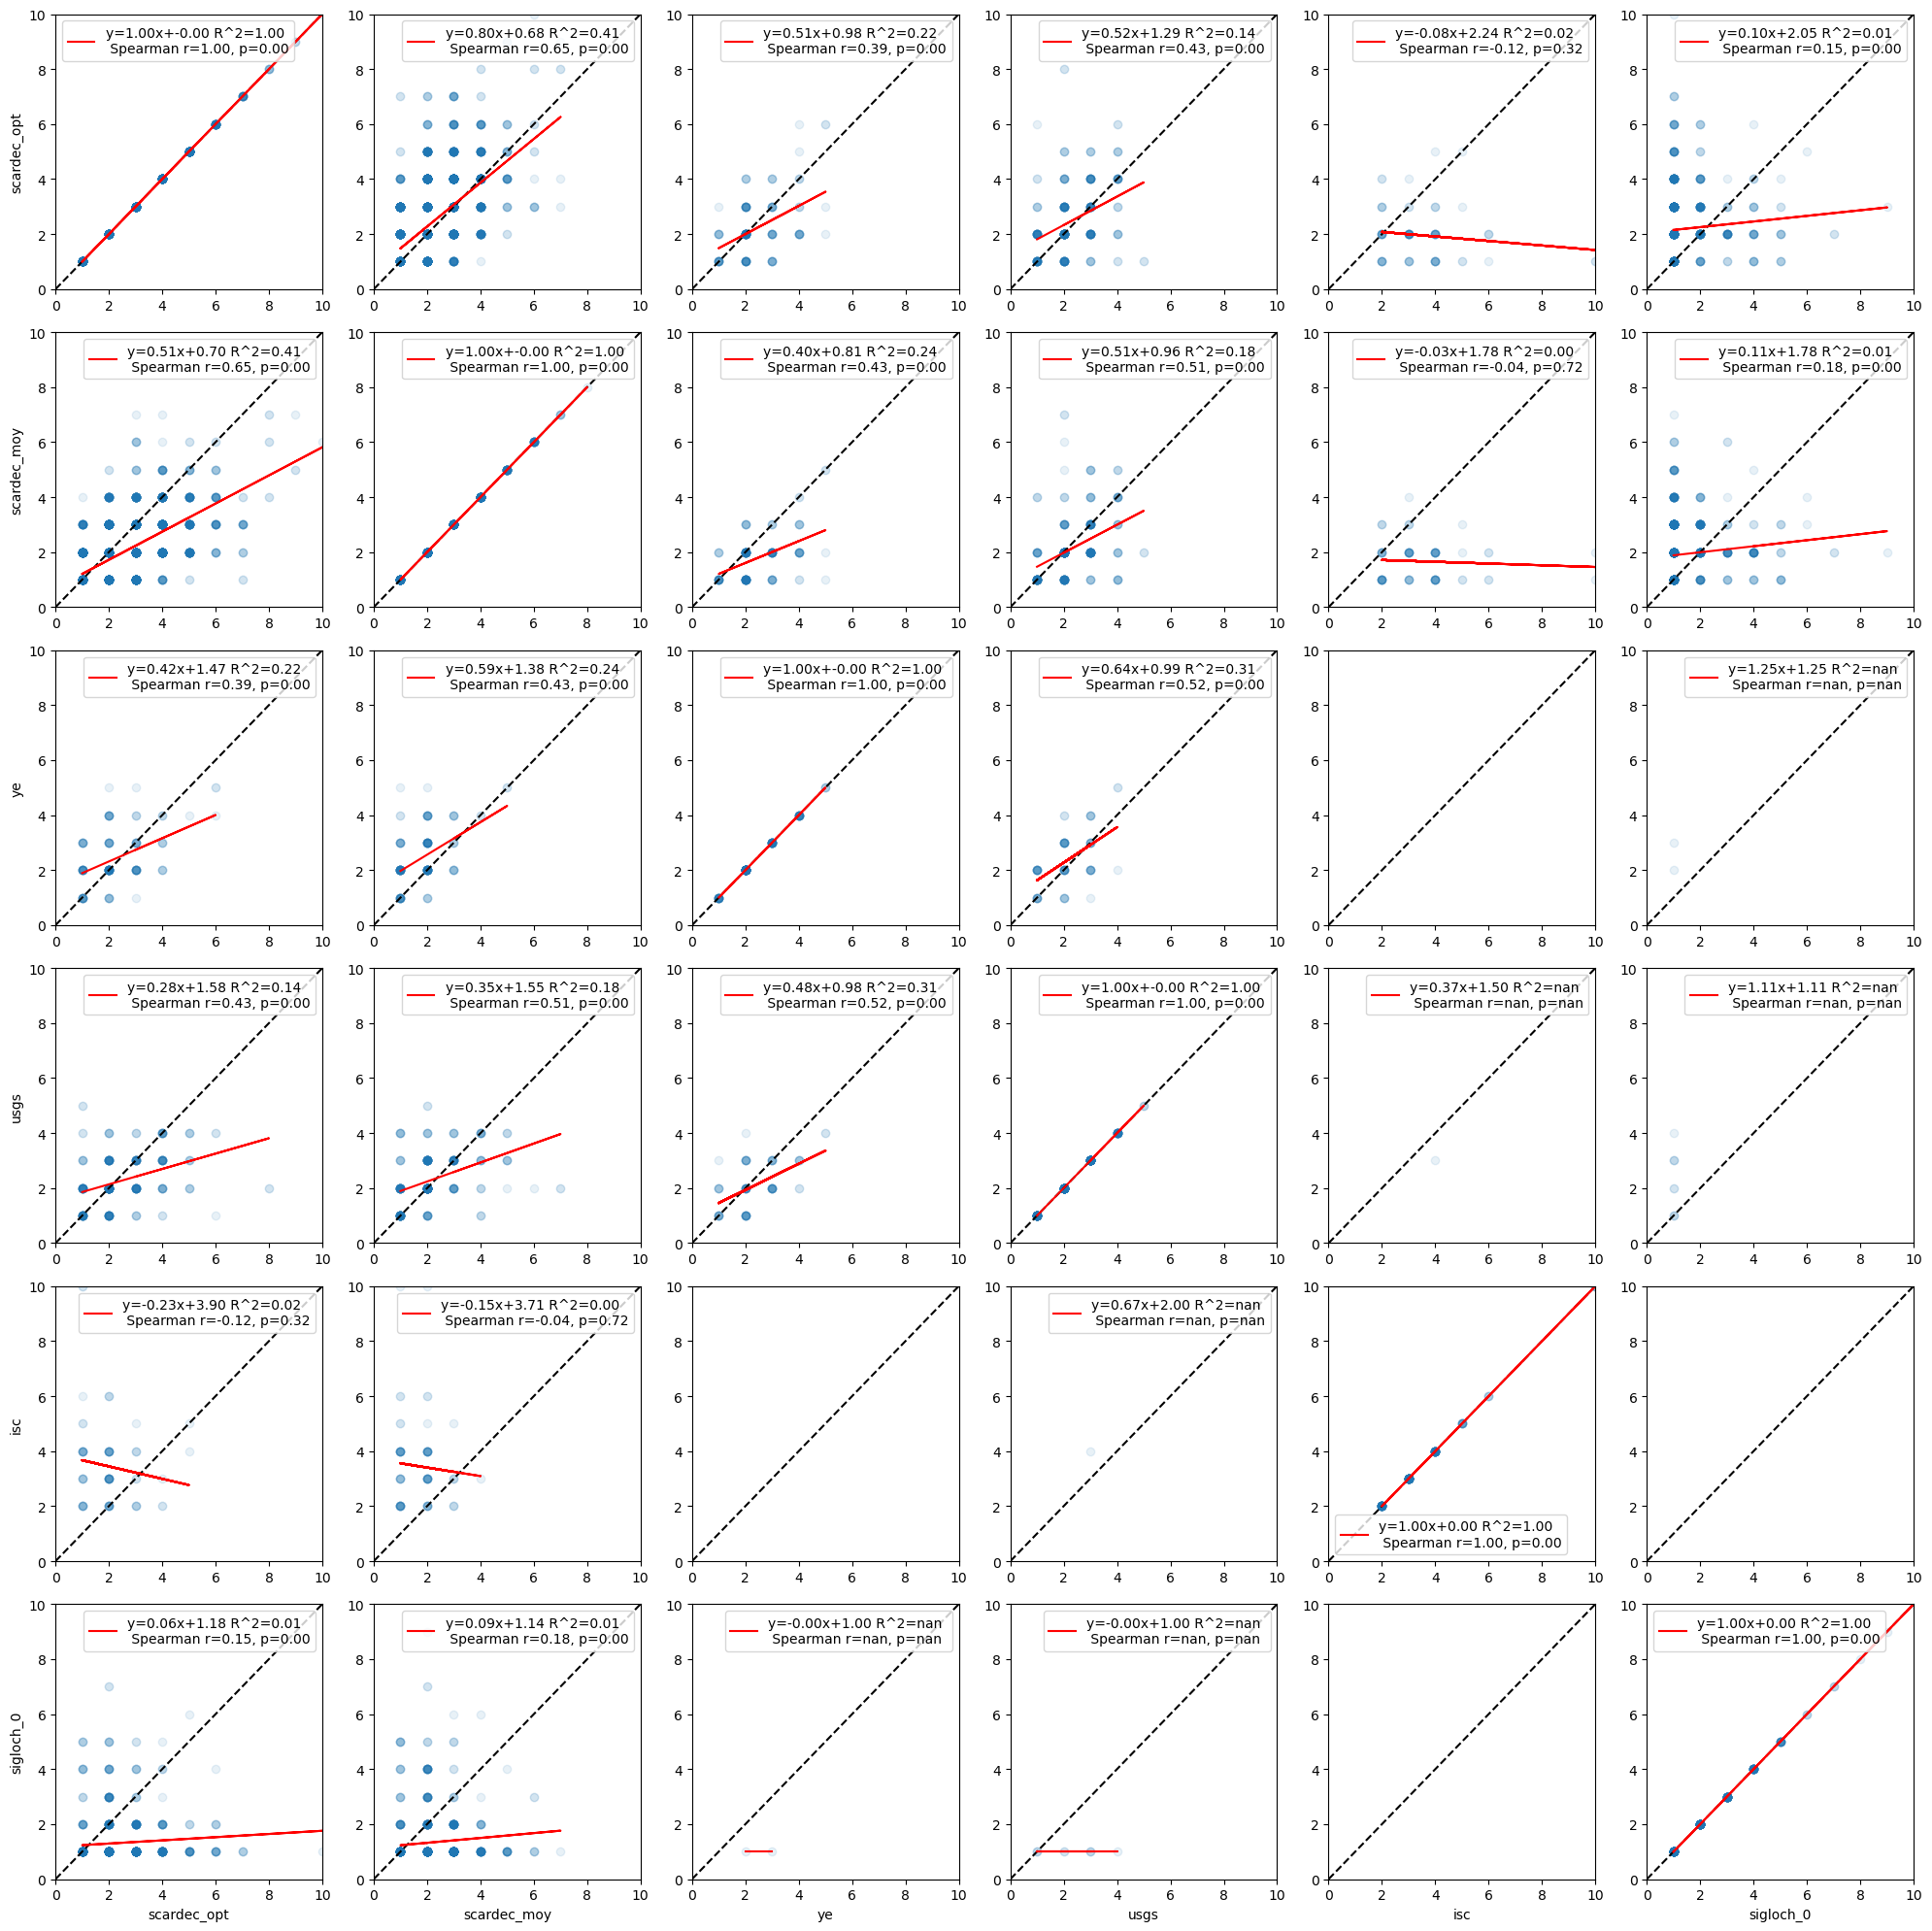

In [90]:
fig, axs = plt.subplots(len(datasets), len(datasets), figsize=(20, 20))
for i in range(0, len(datasets)):
	for j in range(0, len(datasets)):
		axs[i][j].scatter(df[datasets[j]+'_num_gaussians'], df[datasets[i]+'_num_gaussians'], alpha = 0.1)
		axs[i][j].set_xlim(0, 10)
		axs[i][j].set_ylim(0, 10)
		# axs[i][j].set_xlabel(datasets[j])
		# axs[i][j].set_ylabel(datasets[i])
		if i == 5:
			axs[i][j].set_xlabel(datasets[j])
		if j == 0:
			axs[i][j].set_ylabel(datasets[i])
		axs[i][j].plot([0, 10], [0, 10], color='black', linestyle='--')

		x = df[datasets[j]+'_num_gaussians'].values
		y = df[datasets[i]+'_num_gaussians'].values

		idx = np.isfinite(x) & np.isfinite(y)

		print(f"{datasets[i]} vs {datasets[j]}")
		print(len(x[idx]), len(y[idx]))

		# Fit line of best fit
		if len(x[idx])>0 and len(y[idx])>0:
			#try:
			m, b = np.polyfit(x[idx], y[idx], 1)
			R_2 = np.corrcoef(x[idx], y[idx])[0, 1] ** 2
			spearman_r, p = spearmanr(x[idx], y[idx])
			axs[i][j].plot(x[idx], m*x[idx] + b, color='red', label = f'y={m:.2f}x+{b:.2f} R^2={R_2:.2f} \n Spearman r={spearman_r:.2f}, p={p:.2f}')
			axs[i][j].legend()
			# except:
			# 	print(f"error {datasets[i]} vs {datasets[j]}")
plt.tight_layout()
#plt.savefig('/home/earthquakes1/homes/Rebecca/phd/stf/figures/large_scale_peaks_all/results_95_threshold/num_gaussians_different_datasets.png', bbox_inches='tight')

In [71]:
df

,event,scardec_opt_r2,scardec_opt_num_gaussians,scardec_moy_r2,scardec_moy_num_gaussians,ye_r2,ye_num_gaussians,usgs_r2,usgs_num_gaussians,isc_r2,...,sigloch_5_r2,sigloch_5_num_gaussians,sigloch_6_r2,sigloch_6_num_gaussians,sigloch_7_r2,sigloch_7_num_gaussians,sigloch_8_r2,sigloch_8_num_gaussians,sigloch_9_r2,sigloch_9_num_gaussians
0,20170818_0259,0.969343,5.0,0.975607,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20110126_1542,0.978251,2.0,0.983437,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19981010_1629,0.991595,2.0,0.995624,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19920730_0824,0.965802,2.0,0.981683,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19960327_2052,0.998949,8.0,0.994544,6.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6216,20111214_0048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6217,20120317_1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6218,20060106_0339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6219,20090104_0714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
df[datasets[i]+'_num_gaussians'].values

array([nan, nan, nan, ...,  1.,  1.,  1.])

In [91]:
df_combined

,event,scardec_opt_r2,scardec_opt_num_gaussians,scardec_moy_r2,scardec_moy_num_gaussians,ye_r2,ye_num_gaussians,usgs_r2,usgs_num_gaussians,isc_r2,...,sigloch_5_num_gaussians,sigloch_6_r2,sigloch_6_num_gaussians,sigloch_7_r2,sigloch_7_num_gaussians,sigloch_8_r2,sigloch_8_num_gaussians,sigloch_9_r2,sigloch_9_num_gaussians,magnitude
0,20170818_0259,0.969343,5.0,0.975607,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.591
1,20110126_1542,0.978251,2.0,0.983437,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.114
2,19981010_1629,0.991595,2.0,0.995624,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.927
3,19920730_0824,0.965802,2.0,0.981683,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.017
4,19960327_2052,0.998949,8.0,0.994544,6.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4526,20111214_0048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.800
4527,20120317_1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.800
4528,20060106_0339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000
4529,20090104_0714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.900


In [94]:
def myround(x, base=1):
    return base * round(x/base)

In [95]:
catalog = pd.read_csv('/home/earthquakes1/homes/Rebecca/phd/stf/data/combined_m55_catalog.csv', sep = '|')

In [96]:
cols = catalog.columns
column_names = []
for c in cols:
    column_names.append(c.strip().rstrip().lower())
column_names[0] = 'catalog_id'
catalog.columns = column_names

In [97]:
catalog['year'] = catalog.apply(lambda x: x['time'][:4], axis = 1)
catalog['month'] = catalog.apply(lambda x: x['time'][5:7], axis = 1)
catalog['day'] = catalog.apply(lambda x: x['time'][8:10], axis = 1)
catalog['hour'] = catalog.apply(lambda x: x['time'][11:13], axis = 1)
catalog['minute'] = catalog.apply(lambda x: x['time'][14:16], axis = 1)

catalog['event'] = catalog.apply(lambda x: x['year'] + x['month'] + x['day'] + '_' + x['hour'] + x['minute'], axis = 1)

catalog['int_magnitude'] = catalog.apply(lambda x: myround(x['magnitude']), axis = 1)

In [98]:
catalog.drop(columns = ['contributor', 'contributorid', 'magauthor', 'eventlocationname', 'author', 'catalog', 'time'], inplace = True)

In [99]:
catalog = catalog[['event', 'catalog_id', 'year', 'month', 'day', 'hour', 'minute', 'latitude', 'longitude', 'depth/km', 'magnitude', 'int_magnitude', 'magtype']]

In [100]:
catalog

,event,catalog_id,year,month,day,hour,minute,latitude,longitude,depth/km,magnitude,int_magnitude,magtype
0,20250121_1115,11926233,2025,01,21,11,15,-3.7368,151.5823,10.000,5.5,6,Mww
1,20250121_0605,11926190,2025,01,21,06,05,-27.4829,-13.4632,10.000,5.5,6,mb
2,20250121_0547,11926184,2025,01,21,05,47,13.4344,144.3969,137.242,5.5,6,mww
3,20250120_1617,11926033,2025,01,20,16,17,23.2338,120.4749,10.000,6.0,6,mww
4,20250120_0838,11925968,2025,01,20,08,38,-11.3327,165.8206,35.000,5.6,6,mww
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16101,19900108_1944,2808110,1990,01,08,19,44,52.0105,-169.6001,15.000,5.6,6,mb
16102,19900107_0906,2808066,1990,01,07,09,06,-15.9527,-74.2840,48.900,5.9,6,mb
16103,19900106_2144,2808053,1990,01,06,21,44,-10.6437,92.9744,15.000,5.9,6,mw
16104,19900104_0532,2807962,1990,01,04,05,32,-15.4219,-172.9087,42.600,6.4,6,mb


In [101]:
df_combined_depth = df_combined.merge(catalog[['event', 'depth/km']], on='event', how='left')

In [102]:
df_combined_depth

,event,scardec_opt_r2,scardec_opt_num_gaussians,scardec_moy_r2,scardec_moy_num_gaussians,ye_r2,ye_num_gaussians,usgs_r2,usgs_num_gaussians,isc_r2,...,sigloch_6_r2,sigloch_6_num_gaussians,sigloch_7_r2,sigloch_7_num_gaussians,sigloch_8_r2,sigloch_8_num_gaussians,sigloch_9_r2,sigloch_9_num_gaussians,magnitude,depth/km
0,20170818_0259,0.969343,5.0,0.975607,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.591,10.0
1,20110126_1542,0.978251,2.0,0.983437,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.114,23.8
2,19981010_1629,0.991595,2.0,0.995624,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.927,45.6
3,19920730_0824,0.965802,2.0,0.981683,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.017,31.4
4,19960327_2052,0.998949,8.0,0.994544,6.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.157,45.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4591,20111214_0048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.800,16.1
4592,20120317_1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.800,13.6
4593,20060106_0339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000,5.5
4594,20090104_0714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.900,33.7


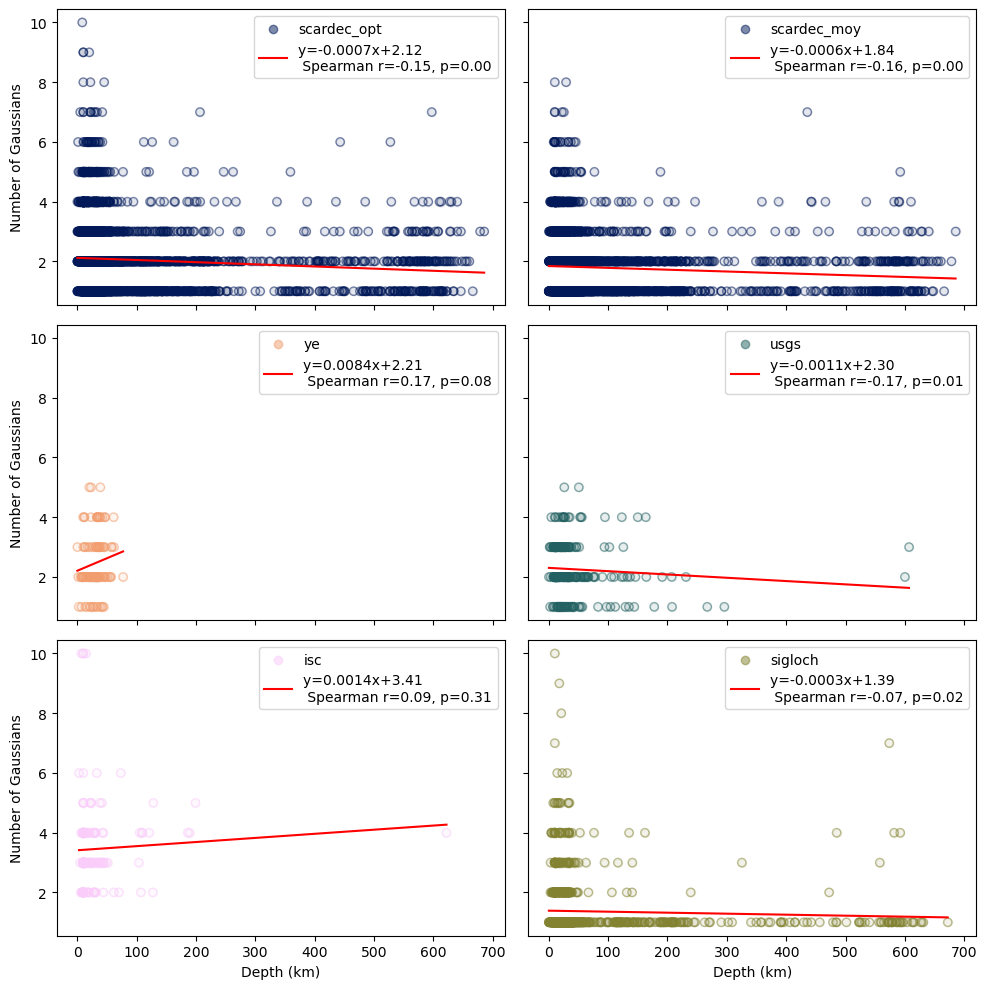

In [124]:
def plot_scatter_with_fit(ax, x, y, color, label):
	if label.startswith('scardec'):
		label_plot = label.split('_')[0] + '_' + label.split('_')[1]
	else:
		label_plot = label.split('_')[0]
	ax.scatter([], [], alpha=0.5, color=color, label=label_plot)
	ax.scatter(x, y, alpha=0.1, color=color)
	ax.scatter(x, y, alpha=0.5, edgecolor=color, facecolor='none')
	idx = np.isfinite(x) & np.isfinite(y)
	m, b = np.polyfit(x[idx], y[idx], 1)
	spearman_r, p = spearmanr(x[idx], y[idx])
	x_plot = np.linspace(x[idx].min(), x[idx].max(), 100)
	ax.plot(x_plot, m*x_plot + b, color='red', label=f'y={m:.4f}x+{b:.2f} \n Spearman r={spearman_r:.2f}, p={p:.2f}')
	ax.legend()

fig, axs = plt.subplots(3, 2, sharex=True, sharey=True, figsize=(10, 10))

datasets = [
	('scardec_opt_num_gaussians', 'scardec'),
	('scardec_moy_num_gaussians', 'scardec'),
	('ye_num_gaussians', 'ye'),
	('usgs_num_gaussians', 'usgs'),
	('isc_num_gaussians', 'isc'),
	('sigloch_0_num_gaussians', 'sigloch')
]

for ax, (dataset, color_key) in zip(axs.flatten(), datasets):
	x = df_combined_depth['depth/km'].values
	y = df_combined_depth[dataset].values
	plot_scatter_with_fit(ax, x, y, dataset_colors[color_key], dataset)

axs[2][0].set_xlabel('Depth (km)')
axs[2][1].set_xlabel('Depth (km)')
axs[0][0].set_ylabel('Number of Gaussians')
axs[1][0].set_ylabel('Number of Gaussians')
axs[2][0].set_ylabel('Number of Gaussians')
plt.tight_layout()
plt.savefig('/home/earthquakes1/homes/Rebecca/phd/stf/figures/large_scale_peaks_all/results_95_threshold/num_gaussians_vs_depth.png', bbox_inches='tight')
